# IR Dark Generation

## Reference: WFC3 Technical Instrument Report 2014-02

# Important****
## in login.cl file: (/Users/mmckay/iraf/login.cl)
reset   taxesim14          = <your path>/taxe/iraf/ ----> /Users/mmckay/iraf/ (line 36)

In [2]:
import glob
from astropy.io import fits
import numpy as np
from astropy.table import Table, Column
import os
import matplotlib.pyplot as plt

In [112]:
work_dir = '/Users/mmckay/Desktop/wfc3_ir_darks/RAPID_FULLIMAGE_darks/'
os.chdir(work_dir)

## Run needed functions 

In [91]:
def image_stats(Image, dq_mask, ext_num):
    '''
    Image_stats calulates statistics of a HST wfc3 flt image
    
    Example call (No dq array applied):
    image_stats('SPARS200_FULLIMAG_final_drk.fits', dq_mask = 'no', ext_num = 1)
    
    Example call (DQ array applied):
    image_stats('SPARS200_FULLIMAG_final_drk.fits', dq_mask = 'yes', ext_num = 1)
    '''
    im = fits.open(Image)
    ext_data = im[ext_num].data
    units = im[1].header['BUNIT']
    filename = im[0].header['FILENAME']
    
    if dq_mask == 'yes':
        print('DQ MASK APPLIED')
        ext_dqmask = im[ext_num + 2].data
        ext_data[ext_dqmask != 0] = np.nan
        print ('{} EXT: {} Statistics ------------------------'.format(filename,ext_num))           
        print ('mean = {} {}'.format(np.nanmean(ext_data), units))
        print ('stddev = {} {}'.format(np.nanstd(ext_data), units))
        print ('median = {} {}'.format(np.nanmedian(ext_data), units))
        print ('min = {} {}'.format(np.nanmin(ext_data), units))
        print ('max = {} {}'.format(np.nanmax(ext_data), units))
        print('')
        
    else:
        print('NO DQ MASK')
        print ('{} EXT: {} Statistics ------------------------'.format(filename,ext_num))
        print ('mean = {} {}'.format(np.nanmean(ext_data), units))
        print ('stddev = {} {}'.format(np.nanstd(ext_data), units))
        print ('median = {} {}'.format(np.nanmedian(ext_data), units))
        print ('min = {} {}'.format(np.nanmin(ext_data), units))
        print ('max = {} {}'.format(np.nanmax(ext_data), units))
        print('')

    im.close()
    
    

# 1.1: Query the quicklook database for all available darks for a given observing mode

In [113]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/* ./')        

0

In [114]:
#os.chdir('/Users/mmckay/Desktop/wfc3_ir_darks/SPARS200_darks/')
%run dark_db_query.py "RAPID" "FULLIMAG"

------------------------------------------------- 11929 -------------------------------------------------
1 /grp/hst/wfc3a/Quicklook/11929/Visit04/ ibcu04p5q_flt.fits Visit04-ibcu04p5q_flt.jpg 11929 ibcu04p5q
2 /grp/hst/wfc3a/Quicklook/11929/Visit0I/ ibcu0ijcq_flt.fits Visit0I-ibcu0ijcq_flt.jpg 11929 ibcu0ijcq
3 /grp/hst/wfc3a/Quicklook/11929/Visit0V/ ibcu0vsxq_flt.fits Visit0V-ibcu0vsxq_flt.jpg 11929 ibcu0vsxq
4 /grp/hst/wfc3a/Quicklook/11929/Visit17/ ibcu17koq_flt.fits Visit17-ibcu17koq_flt.jpg 11929 ibcu17koq
5 /grp/hst/wfc3a/Quicklook/11929/Visit1I/ ibcu1ijlq_flt.fits Visit1I-ibcu1ijlq_flt.jpg 11929 ibcu1ijlq
6 /grp/hst/wfc3a/Quicklook/11929/Visit1V/ ibcu1vm6q_flt.fits Visit1V-ibcu1vm6q_flt.jpg 11929 ibcu1vm6q
7 /grp/hst/wfc3a/Quicklook/11929/Visit2I/ ibcu2iltq_flt.fits Visit2I-ibcu2iltq_flt.jpg 11929 ibcu2iltq
8 /grp/hst/wfc3a/Quicklook/11929/Visit2V/ ibcu2vqbq_flt.fits Visit2V-ibcu2vqbq_flt.jpg 11929 ibcu2vqbq
9 /grp/hst/wfc3a/Quicklook/11929/Visit30/ ibcu30ldq_flt.fits Visit30-i

# 1.2: Download raw.fits and spt.fits files

## This step is done manually. There is no code to automatically download the files.

In [115]:
#Pull cycle 23 data if no files are found
os.chdir('/Users/mmckay/Desktop/wfc3_ir_darks/cycle23_14374/')
files = glob.glob('*raw.fits')
samp_seq = 'RAPID'

for i in files:
    hdu = fits.open(i)
    if hdu[0].header['SAMP_SEQ'] == samp_seq:
        print(hdu[0].header['SAMP_SEQ'], hdu[0].header['ROOTNAME'])
        os.system('cp {}_raw.fits {}'.format(hdu[0].header['ROOTNAME'], work_dir))
        os.system('cp {}_spt.fits {}'.format(hdu[0].header['ROOTNAME'], work_dir))
        
os.chdir(work_dir)

('RAPID', 'id0c25i3q')
('RAPID', 'id0c25i4q')
('RAPID', 'id0c25i6q')
('RAPID', 'id0c25i7q')
('RAPID', 'id0c26i9q')
('RAPID', 'id0c26iaq')
('RAPID', 'id0c26icq')
('RAPID', 'id0c26idq')
('RAPID', 'id0c27j2q')
('RAPID', 'id0c27j3q')
('RAPID', 'id0c27j5q')
('RAPID', 'id0c27j6q')
('RAPID', 'id0c28jwq')
('RAPID', 'id0c28jxq')
('RAPID', 'id0c28jzq')
('RAPID', 'id0c28k0q')
('RAPID', 'id0c29k2q')
('RAPID', 'id0c29k3q')
('RAPID', 'id0c29k5q')
('RAPID', 'id0c29k6q')
('RAPID', 'id0c93gtq')
('RAPID', 'id0c93guq')
('RAPID', 'id0c93gvq')
('RAPID', 'id0c93gwq')
('RAPID', 'id0c93gxq')
('RAPID', 'id0c93gyq')
('RAPID', 'id0c93gzq')
('RAPID', 'id0c93h0q')
('RAPID', 'id0c93h2q')
('RAPID', 'id0c93h3q')
('RAPID', 'id0c93h4q')
('RAPID', 'id0c93h5q')
('RAPID', 'id0c93h6q')
('RAPID', 'id0c93h7q')
('RAPID', 'id0c93h8q')
('RAPID', 'id0c93h9q')
('RAPID', 'id0c93haq')
('RAPID', 'id0c93hbq')
('RAPID', 'id0c93hcq')
('RAPID', 'id0c93hdq')
('RAPID', 'id0c93heq')
('RAPID', 'id0c93hfq')
('RAPID', 'id0c93hgq')
('RAPID', '

In [116]:
#Pull cycle 24 data if no files are found
os.chdir('/Users/mmckay/Desktop/wfc3_ir_darks/cycle24_14537/')
files = glob.glob('*raw.fits')
samp_seq = 'RAPID'

for i in files:
    hdu = fits.open(i)
    if hdu[0].header['SAMP_SEQ'] == samp_seq:
        print(hdu[0].header['SAMP_SEQ'], hdu[0].header['ROOTNAME'])
        os.system('cp {}_raw.fits {}'.format(hdu[0].header['ROOTNAME'], work_dir))
        os.system('cp {}_spt.fits {}'.format(hdu[0].header['ROOTNAME'], work_dir))
        
os.chdir(work_dir)

('RAPID', 'idbx26peq')
('RAPID', 'idbx26pfq')
('RAPID', 'idbx26phq')
('RAPID', 'idbx26piq')
('RAPID', 'idbx27xsq')
('RAPID', 'idbx27xtq')
('RAPID', 'idbx27xvq')
('RAPID', 'idbx27xwq')
('RAPID', 'idbx28z5q')
('RAPID', 'idbx28z6q')
('RAPID', 'idbx28z8q')
('RAPID', 'idbx28z9q')
('RAPID', 'idbx29avq')
('RAPID', 'idbx29awq')
('RAPID', 'idbx29ayq')
('RAPID', 'idbx29azq')
('RAPID', 'idbx30buq')
('RAPID', 'idbx30bvq')
('RAPID', 'idbx30bxq')
('RAPID', 'idbx30byq')
('RAPID', 'idbx95d6q')
('RAPID', 'idbx95d7q')
('RAPID', 'idbx95d8q')
('RAPID', 'idbx95d9q')
('RAPID', 'idbx95daq')
('RAPID', 'idbx95dbq')
('RAPID', 'idbx95dcq')
('RAPID', 'idbx95ddq')
('RAPID', 'idbx95dfq')
('RAPID', 'idbx95dgq')
('RAPID', 'idbx95dhq')
('RAPID', 'idbx95diq')
('RAPID', 'idbx95djq')
('RAPID', 'idbx95dkq')
('RAPID', 'idbx95dlq')
('RAPID', 'idbx95dmq')
('RAPID', 'idbx95dnq')
('RAPID', 'idbx95doq')
('RAPID', 'idbx95dpq')
('RAPID', 'idbx95dqq')
('RAPID', 'idbx95drq')
('RAPID', 'idbx95dsq')
('RAPID', 'idbx95dtq')
('RAPID', '

# 1.3: Reprocess downloaded raw.fits files and flag persistence

## This code first runs whichever version of wfc3tools.calwf3 the user has installed on his or her machine with a standardized set of calibration switch settings (listed in Table 2) to reprocess the raw.fits files and produce calibrated ima.fits and flt.fits files.


In [118]:
os.chdir(work_dir)

#Make a txt file of the raw files 
filename_list = []
list_of_files = glob.glob('*raw.fits')

for im in list_of_files:
    hdu = fits.open(im)
    filename = hdu[0].header['filename']
    filename_list.append(filename)
    hdu.close()
rawfiles = Table([filename_list])
rawfiles.write('rawfiles.txt',format='ascii.fast_no_header', overwrite=True)

In [120]:
%run reproc_persflag_irdarks_gensize.py 'rawfiles.txt'   

1 371 ibcu04p5q_raw.fits ibcu04p5q_ima.fits ibcu04p5q_ima_persflag.fits




CALWF3BEG*** CALWF3 -- Version 3.4(28-Sep-2016) ***

Begin    11-Jun-2018 15:47:25 EDT





Input    ibcu04p5q_raw.fits

loading asn



LoadAsn:  Processing SINGLE exposure

Trying to open ibcu04p5q_raw.fits...

Read in Primary header from ibcu04p5q_raw.fits...

Creating new trailer file `ibcu04p5q.tra'.





CALWF3BEG*** WF3IR -- Version 3.4(28-Sep-2016) ***

Begin    11-Jun-2018 15:47:28 EDT

Input    ibcu04p5q_raw.fits

Output   ibcu04p5q_flt.fits

Trying to open ibcu04p5q_raw.fits...

Read in Primary header from ibcu04p5q_raw.fits...

APERTURE IR

FILTER   Blank

DETECTOR IR

Reading data from ibcu04p5q_raw.fits ...



CCDTAB   iref$t2c16200i_ccd.fits

CCDTAB   PEDIGREE=Ground

CCDTAB   DESCRIP =Reference data based on Thermal-Vac #3, gain=2.5 results for IR-4

CCDTAB   DESCRIP =Readnoise,gain,saturation from TV3,MEB2 values. ISRs 2008-25,39,50

    readnoise =20.2,19.8,19.9,20.1

    gain =2.34,2.37,2.31,2

In [123]:
#Run in terminal (Python 2.7 env) if apply_persisitance_mask_gensize.py does not work
%run apply_persistance_mask_gensize_2.py 'imalist.txt'

fltname: ibcu04p5q_flt.fits
('/grp/hst/wfc3a/Cal_Links/11929/Visit04/Persist/ibcu04p5q_extper.fits', <type 'str'>)
>>>>>>>>>>> ibcu04p5q_ima.fits ibcu04p5q_flt.fits /grp/hst/wfc3a/Cal_Links/11929/Visit04/Persist/ibcu04p5q_extper.fits True <<<<<<<<<<<<<
fraction of pixels in image ibcu04p5q_ima.fits flagged as suffering from persistance: 0.000000%
fltname: ibcu0ijcq_flt.fits
('/grp/hst/wfc3a/Cal_Links/11929/Visit0I/Persist/ibcu0ijcq_extper.fits', <type 'str'>)
>>>>>>>>>>> ibcu0ijcq_ima.fits ibcu0ijcq_flt.fits /grp/hst/wfc3a/Cal_Links/11929/Visit0I/Persist/ibcu0ijcq_extper.fits True <<<<<<<<<<<<<
fraction of pixels in image ibcu0ijcq_ima.fits flagged as suffering from persistance: 0.000000%
fltname: ibcu0vsxq_flt.fits
('/grp/hst/wfc3a/Cal_Links/11929/Visit0V/Persist/ibcu0vsxq_extper.fits', <type 'str'>)
>>>>>>>>>>> ibcu0vsxq_ima.fits ibcu0vsxq_flt.fits /grp/hst/wfc3a/Cal_Links/11929/Visit0V/Persist/ibcu0vsxq_extper.fits True <<<<<<<<<<<<<
fraction of pixels in image ibcu0vsxq_ima.fits fl

In [103]:
os.chdir(work_dir)

# 2: INPUT FILE VETTING




## 2.1: Visually inspect SCI and dq extensions of the longest read of persistence flagged IMA files

Summary
This code automates the visual inspection of input files. For each image in the userspecified
input list, the code displays the science extension, data quality extension, and
the persistence mask in DS9, and prints the number and percentage of persistence-flagged
pixels to the screen. The science extension of the previous image is also displayed in DS9
for comparative purposes.

## Rejection Criteria
### Images with evidence of banding (see Dulude et al. 2011) (see Figure 1)
### Images with significant fractions of all pixels (>25%) flagged as persistence
### Images containing bright extended sources (see Figure 2)
### Images containing unflagged extended sources
### Sets of images containing the same unflagged source in the same (or near same) location
### Images with lots of scattered light, particularly on the right edge and lower right corner (see Figure 3)

In [46]:
#open txt file to list rejected images Record the _ima_persflag.fits
os.system('sublime badlist_0.txt')

#open txt file to record the reason for rejection images (refer to WFC3/TIR 2014-02 section 2.1)       
os.system('sublime rej_record.txt')

0

In [8]:

%run /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/list_disp_sci_dq_gensize_2.py "pf_list_0.txt" 

# Run in terminal - (Make sure you are in your working directory)
#python /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/list_disp_sci_dq_gensize_2.py "pf_list_0.txt" 


# 2.2: Remove rejected files from list of good input files

This script automates the process of removing rejected input image filenames from file
lists. The script performs the following operation:
old list - list of rejected files from old list = new list
We recommend that this step be performed after each input file vetting step to
“compartmentalize” each vetting/rejection cycle in order to make the end-to-end vetting
and rejection process more clear, and if need be, reversible. We also recommend logging
the number of files rejected, and the number remaining after each vetting step.


### Code Path
• detectors/ir_darkgen/rejectfilesfromlist.py
### Calling Sequence
• rejectfilesfromlist.py old_file rej_file new_file
### Inputs
• old_file: name of the input list file used in the most recent input image vetting
step which contains both good images and those to be rejected.
• rej_file: name of file containing files to be rejected from above file
• new_file: name of the new input list containing just the good files
### Output
• A text file containing just non-rejected filenames (new_file)
### Example Run
• Create trimmed list file pf_list_1.txt, which contains the files listed in file
"pf_list_0.txt" that are not contained in the list of rejected images "badlist_0.txt":
python rejectfilesfromlist.py "pf_list_0.txt" "badlist_0.txt"
"pf_list_1.txt"

In [49]:
%run /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/rejectfilesfromlist.py 'pf_list_0.txt' 'badlist_0.txt' 'pf_list_1.txt'     

1 ibcu01neq_ima_persflag.fits
2 ibcu08xyq_ima_persflag.fits
3 ibcu0cp4q_ima_persflag.fits
4 ibcu0eiiq_ima_persflag.fits
5 ibcu0fi5q_ima_persflag.fits
6 ibcu0mc4q_ima_persflag.fits
7 ibcu0pr2q_ima_persflag.fits
8 ibcu0ri6q_ima_persflag.fits
9 ibcu0shoq_ima_persflag.fits
10 ibcu0zdiq_ima_persflag.fits
11 ibcu11mvq_ima_persflag.fits
12 ibcu13epq_ima_persflag.fits
13 ibcu14k4q_ima_persflag.fits
14 ibcu1cmtq_ima_persflag.fits
15 ibcu1ezoq_ima_persflag.fits
16 ibcu1fjiq_ima_persflag.fits
17 ibcu1mfbq_ima_persflag.fits
18 ibcu1prvq_ima_persflag.fits
19 ibcu1ragq_ima_persflag.fits
20 ibcu1sn1q_ima_persflag.fits
21 ibcu1zfeq_ima_persflag.fits
22 ibcu21kwq_ima_persflag.fits
23 ibcu24t4q_ima_persflag.fits
24 ibcu26m9q_ima_persflag.fits
25 ibcu27l8q_ima_persflag.fits
26 ibcu2cq9q_ima_persflag.fits
27 ibcu2ehxq_ima_persflag.fits
28 ibcu2fj2q_ima_persflag.fits
29 ibcu2mczq_ima_persflag.fits
30 ibcu2pmyq_ima_persflag.fits
31 ibcu2rddq_ima_persflag.fits
32 ibcu2sq8q_ima_persflag.fits
33 ibcu2zokq_ima_

# 2.3: Inspect individual X-axis and Y-axis marginal distributions

## *list rejected files in badlist_1.txt*

Depending on the user's choice of axis, this code computes a 3-sigma clipped mean value
for each row or column of a given image. These values are then plotted. The user can also
specify if all pixels should be included in the calculations or just the non-flagged (DQ
value = 0) pixels.
This code was originally written as a way to better identify images suffering from
Banding (see Dulude et al. 2011). It was subsequently updated to provide users with a
way to inspect brightness levels of images as a function of either X or Y, rather than just
Y.
When the user chooses Y-axis mode, the code also displays the locations of each of the
banding boundaries as sets of vertical dashed lines on the plot to aide in the identification
of banded images.

### Code Path(s)
• detectors/ir_darkgen/list_plot_marg_dist.pro
• detectors/ir_darkgen/plot_marg_dist_3.pro (called by list_plot_marg_dist)
###Calling Sequence
• list_plot_marg_dist,list_name,extenstion,plot_axis,padding,psout=psout,ignore_fp
ix=ignore_fpix
### Inputs
• list_name: name of file containing list of images to plot, one per line
• extension: specific extension to plot (1=(sci,1), 2=(err,1), etc.)
• plot_axis: which axis to perform marginal distribution on ('X' or 'Y').
o 'X' will collapse all pixels in each column into a single value, creating a
"superrow" for plotting
o 'Y' will collapse all pixels in each row into a single value, creating a
"supercolumn" for plotting
• padding: The number of pixels in from each edge to ignore
### Optional Inputs
• psout: whether or not to generate postscript version of the plots. If not specified,
the code will not produce postscript versions of the plots.
• ignore_fpix: whether or not to ignore pixels whose DQ value is greater than zero
from the calculations. If not set, the default setting is to include all pixels,
regardless of DQ value.
### Output
• When the postscript generation option is turned on, a copy of the plot will be
written to 'margdist_plot.ps'. This file will be overwritten for each image
displayed.
### Example Runs
• Plot X-axis marginal distributions of columns 10-1014 from the longest (sci,1)
extension for files in 'pf_list_1.txt' without generating a .ps file of the plot.
IDL> list_plot_marg_dist,'pf_list_1.txt',1,'x',10
• Plot both on-screen and postscript versions of Y-axis marginal distributions using
non-flagged pix only of columns 10-1014 from the longest (sci,1) extension for
files in 'pf_list_1.txt'
IDL>
list_plot_marg_dist,'pf_list_1.txt',1,'y',10,/psout,/ignore_fpix


In [53]:
#copy IDL scripts to current directory (working dir)

os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/list_plot_marg_dist.pro ./')
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/plot_marg_dist_3.pro ./')

0

In [9]:
#open txt file to list rejected images Record the _ima_persflag.fits
#For the rejection criteria (See WFC3 TIR 2014-02)
os.system('sublime badlist_1.txt')

0

In [40]:
#Run code in terminal (IDL)
#IDL> .r list_plot_marg_dist

#Plot the X-axis marginal distrubution for ext1
#IDL> list_plot_marg_dist,'pf_list_1.txt',1,'x',10,/ignore_fpix

#Before ruuning the next code remove the rejected files using the rejectfilesfromlist.py script
#(Below)

#Plot the Y-axis marginal distrubution for ext1
#IDL> list_plot_marg_dist,'pf_list_2.txt',1,'y',10,/ignore_fpix

In [12]:
#After vetting
#Remove rejected files in badlist_1.txt
%run /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/rejectfilesfromlist.py 'pf_list_1.txt' 'badlist_1.txt' 'pf_list_2.txt'     

1 ibcu01neq_ima_persflag.fits
2 ibcu08xyq_ima_persflag.fits
3 ibcu0cp4q_ima_persflag.fits
4 ibcu0eiiq_ima_persflag.fits
5 ibcu0fi5q_ima_persflag.fits
6 ibcu0mc4q_ima_persflag.fits
7 ibcu0pr2q_ima_persflag.fits
REJECT        ibcu0ri6q_ima_persflag.fits
8 ibcu0shoq_ima_persflag.fits
9 ibcu0zdiq_ima_persflag.fits
10 ibcu11mvq_ima_persflag.fits
11 ibcu13epq_ima_persflag.fits
12 ibcu14k4q_ima_persflag.fits
13 ibcu1cmtq_ima_persflag.fits
14 ibcu1ezoq_ima_persflag.fits
15 ibcu1fjiq_ima_persflag.fits
16 ibcu1mfbq_ima_persflag.fits
17 ibcu1prvq_ima_persflag.fits
18 ibcu1ragq_ima_persflag.fits
19 ibcu1sn1q_ima_persflag.fits
20 ibcu1zfeq_ima_persflag.fits
21 ibcu21kwq_ima_persflag.fits
22 ibcu24t4q_ima_persflag.fits
23 ibcu26m9q_ima_persflag.fits
24 ibcu27l8q_ima_persflag.fits
25 ibcu2cq9q_ima_persflag.fits
26 ibcu2ehxq_ima_persflag.fits
27 ibcu2fj2q_ima_persflag.fits
REJECT        ibcu2mczq_ima_persflag.fits
28 ibcu2pmyq_ima_persflag.fits
29 ibcu2rddq_ima_persflag.fits
REJECT        ibcu2sq8q_im

# 2.4: Inspect X-axis and Y-axis marginal distributions of all images in context
## list rejected files in badlist_2.txt
### Summary
The purpose of this step is to identify and reject images that don't conform to the
common shared morphologies of the majority of input images or have levels significantly
above or below that of the majority.
This step is very similar the previous step--It really only differs in how the plots are
presented. Instead of viewing the marginal distribution of each image individually in
isolation, each marginal distribution is plotted in red against the marginal distribution
plots of all the other input images in the list.
### Rejection Criteria
Images meeting one or more of the following criteria should be rejected (see Section 2.2),
and should not be used in the creation of the superdark calibration file:
• Y-Axis ONLY: Images with evidence of banding. See Figure 6 for an example of
banding.
• Images whose marginal distribution has levels significantly above or below the
rest, as illustrated by the group of marginal distributions that are above the
majority in Figure 7.
• Images whose marginal distributions have features that are significantly different
from the rest, as illustrated by the marginal distribution plotted in red in Figure 7.

### Code Path
• detectors/ir_darkgen/list_plot_marg_dist_allatonce.pro
### Calling Sequence
• list_plot_marg_dist_allatonce,list_name,extension,plot_axis,padding,psout=psout,
ignore_fpix=ignore_fpix
### Inputs
• list_name: name of text file containing a list of images to plot, one per line
• extension: specific extension to plot (1=(sci,1), 2=(err,1), etc.)
• axis: which axis to perform marginal distribution on ('X' or 'Y').
o 'X' will collapse all pixels in each column into a single value, creating a
"superrow" for plotting
o 'Y' will collapse all pixels in each row into a single value, creating a
"supercolumn" for plotting
• padding: The number of pixels in from each edge to ignore
### Optional Inputs
• psout: whether or not to generate postscript version of the plots. If not specified,
the code will not produce postscript versions of the plots.
• ignore_fpix: whether or not to ignore pixels whose DQ value is greater than zero
from the calculations. If not set, the default setting is to include all pixels,
regardless of DQ value.
### Output
• When the postscript generation option is turned on, a copy of the plot will be
written to 'list_margdist_plot.ps'. This file will be overwritten for each image
displayed.
### Example Run
• Plot both on-screen and postscript versions of all y-axis marginal distributions
using non-flagged pix only of columns 10-1014 from the longest (sci,1) extension
for files in 'pf_list_1.txt'
IDL>list_plot_marg_dist_allatonce,'pf_list_2.txt',1,'y',10,/psout,/ignore_fpix

In [13]:
#Copy IDL script to current directory(working directory)
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/list_plot_marg_dist_allatonce.pro ./')    

0

In [ ]:
#IDL> .r list_plot_marg_dist_allatonce.pro

#Plot the X-axis marginal distrubution of ext1 for all images
#IDL> list_plot_marg_dist_allatonce,'pf_list_2.txt',1,'x',10,/psout,/ignore_fpix


#Before ruuning the next code remove the rejected files using the rejectfilesfromlist.py script
#(Below)


#Plot the X-axis marginal distrubution of ext1 for all images
#IDL> list_plot_marg_dist_allatonce,'pf_list_2.txt',1,'y',10,/psout,/ignore_fpix

In [14]:
#Remove rejected files in badlist_2.txt
%run /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/rejectfilesfromlist.py 'pf_list_2.txt' 'badlist_2.txt' 'pf_list_3.txt'     

1 ibcu01neq_ima_persflag.fits
2 ibcu08xyq_ima_persflag.fits
3 ibcu0cp4q_ima_persflag.fits
4 ibcu0eiiq_ima_persflag.fits
5 ibcu0fi5q_ima_persflag.fits
6 ibcu0mc4q_ima_persflag.fits
7 ibcu0pr2q_ima_persflag.fits
8 ibcu0shoq_ima_persflag.fits
9 ibcu0zdiq_ima_persflag.fits
10 ibcu11mvq_ima_persflag.fits
11 ibcu13epq_ima_persflag.fits
12 ibcu14k4q_ima_persflag.fits
13 ibcu1cmtq_ima_persflag.fits
14 ibcu1ezoq_ima_persflag.fits
15 ibcu1fjiq_ima_persflag.fits
16 ibcu1mfbq_ima_persflag.fits
17 ibcu1prvq_ima_persflag.fits
18 ibcu1ragq_ima_persflag.fits
19 ibcu1sn1q_ima_persflag.fits
20 ibcu1zfeq_ima_persflag.fits
21 ibcu21kwq_ima_persflag.fits
22 ibcu24t4q_ima_persflag.fits
23 ibcu26m9q_ima_persflag.fits
24 ibcu27l8q_ima_persflag.fits
25 ibcu2cq9q_ima_persflag.fits
26 ibcu2ehxq_ima_persflag.fits
27 ibcu2fj2q_ima_persflag.fits
28 ibcu2pmyq_ima_persflag.fits
29 ibcu2rddq_ima_persflag.fits
30 ibcu2zokq_ima_persflag.fits
31 ibcu37zgq_ima_persflag.fits
32 ibcu39u5q_ima_persflag.fits
33 ibcu3clzq_ima_

# 2.5: Inspect full-frame up-the-ramp levels
### Summary
The purpose of this code is to provide the user with a sense of the up-the-ramp levels for
each individual image in the context of the up-the-ramp levels of all the input files as a
group.
Up to this point, all the inspection and rejection has been performed on the longest read,
which by itself isn't a bad thing, but it doesn't provide the whole picture.
This code plots the 3-sigma clipped resistant mean for the entire frame (ignoring flagged
pixels) of each read of each image for the user-specified fits file extension.
The plots are presented in a manner similar to that of list_plot_marg_dist_allatonce.pro,
in that the user steps through the up-the-ramp plot for each image, and the up-the-ramp
plots of all images are plotted in the background as context. 3-sigma bounds are also
plotted for each read (dotted lines) to aid in image rejection.
### Rejection Criteria
Images meeting one or more of the following criteria should be rejected (see Section 2.2),
and should not used in the creation of the superdark calibration file:

• Images whose plots differ significantly from the overall trend (see Figure 8)

• Images whose up-the-ramp plots exceed the 3-sigma envelope (see Figure 8)
### Important Notes
• Due to the fact that the code has to compute a resistant mean value for all 16 reads
of each image, execution of this code can take some time for larger (>100 files)
input lists.

• Under normal circumstances, one inspection-rejection pass is sufficient to screen
out bad images. With each successive inspection-rejection pass, the 3-sigma
envelope shrinks, making it seem that additional images need to be rejected,
leading to overzealous image rejection. Overzealous image rejection does little to
reduce noise, and actually degrades the signal.

### Code Path
• detectors/ir_darkgen/uptheramp_rm_plotter_ignoreflags.pro
### Calling Sequence
• uptheramp_rm_plotter_ignoreflags,infilename,exten,psout=psout,time_mode=tim
e_mode
### Inputs
• infilename: Name of a text file containing files to be plotted, one per line

• exten: type of fits file extension to be plotted (i.e. sci, err, dq, samp, or time).

    o Users are advised to avoid using this on the DQ extensions, as the code will yield non-sensible results.
### Optional Inputs
• psout: whether or not to generate postscript version of the plots. If not specified,
the code will not produce postscript versions of the plots.

• time_mode: if set, the X-axis will be in elapsed exposure time, rather than read
number
### Output
• If the postscript generation option is turned on, then a copy of the plot will be
written to 'list_uptheramp_plot.ps'. This file will be overwritten for each image
displayed.
### Example Run
• Generate up-the-ramp plots for the SCI extensions of all the files listed in
pf_list_3.txt. Generate postscript plots and set the x axis to show the elapsed
exposure time:
IDL> uptheramp_rm_plotter_ignoreflags,'pf_list_3.txt','sci',/psout,/time_mode


In [16]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/uptheramp_rm_plotter_ignoreflags.pro ./')

0

In [17]:
#List all rejected ima files in badlist_3.txt
os.system('sublime badlist_3.txt')

0

In [ ]:
#RUN IDL codes in terminal
#IDL> .r uptheramp_rm_plotter_ignoreflags.pro
#IDL> uptheramp_rm_plotter_ignoreflags,'pf_list_3.txt','sci'
#IDL> uptheramp_rm_plotter_ignoreflags,'pf_list_3.txt','err'

In [19]:
#Remove rejected files in badlist_3.txt
%run /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/rejectfilesfromlist.py 'pf_list_3.txt' 'badlist_3.txt' 'pf_list_4.txt'     

1 ibcu01neq_ima_persflag.fits
2 ibcu08xyq_ima_persflag.fits
3 ibcu0cp4q_ima_persflag.fits
4 ibcu0eiiq_ima_persflag.fits
5 ibcu0fi5q_ima_persflag.fits
6 ibcu0mc4q_ima_persflag.fits
7 ibcu0pr2q_ima_persflag.fits
8 ibcu0shoq_ima_persflag.fits
9 ibcu0zdiq_ima_persflag.fits
10 ibcu11mvq_ima_persflag.fits
11 ibcu13epq_ima_persflag.fits
12 ibcu14k4q_ima_persflag.fits
13 ibcu1cmtq_ima_persflag.fits
14 ibcu1ezoq_ima_persflag.fits
15 ibcu1fjiq_ima_persflag.fits
16 ibcu1mfbq_ima_persflag.fits
17 ibcu1prvq_ima_persflag.fits
18 ibcu1ragq_ima_persflag.fits
19 ibcu1sn1q_ima_persflag.fits
20 ibcu1zfeq_ima_persflag.fits
21 ibcu21kwq_ima_persflag.fits
22 ibcu24t4q_ima_persflag.fits
23 ibcu26m9q_ima_persflag.fits
24 ibcu27l8q_ima_persflag.fits
25 ibcu2cq9q_ima_persflag.fits
26 ibcu2ehxq_ima_persflag.fits
27 ibcu2fj2q_ima_persflag.fits
28 ibcu2pmyq_ima_persflag.fits
29 ibcu2rddq_ima_persflag.fits
30 ibcu2zokq_ima_persflag.fits
31 ibcu37zgq_ima_persflag.fits
32 ibcu39u5q_ima_persflag.fits
33 ibcu3clzq_ima_

# 2.6: Inspect whole-frame mean values as a function of time
### Summary
The purpose of this step is to identify and reject anomalously bright and/or dim images
and to aid users in the identification of long-term brightness variations in the dark input
files.
This code computes the mean value of the non-flagged pixels in the user-specified
extension of each image, and plots this value along with the mean of all the data points
(dashed line). 3-sigma upper and lower bounds (dotted lines) are also plotted to aid in
rejection of bad images.
Rejection Criteria
Images meeting the following criteria should be rejected (see Section 2.2), and should not
be used in the creation of the superdark calibration file:

• Images whose whole-frame values exceed the 3-sigma upper or lower bounds
(dotted lines) (see Figure 9)
### Important Notes
• As with the previous step, one inspection-rejection pass is sufficient to screen out
bad images under normal circumstances. With each successive inspectionrejection
pass, the 3-sigma envelope shrinks, making it seem that additional
images need to be rejected, leading to overzealous image rejection. Overzealous
image rejection does little to reduce noise, and actually degrades the signal.

• Unlike the code used in the previous step, this code can only plot values for a
single read per run. Multiple runs are therefore necessary to see additional reads.

### Code Path
• detectors/ir_darkgen/list_plot_rm_values_vs_time_ignoreflags.pro

### Calling Sequence
• list_plot_rm_values_vs_time_ignoreflags,infilename,exten,psout=psout

### Inputs
• infilename: name of a text file containing files to be plotted, one per line

• exten: specific extension of fits files to be plotted (1=SCI frame of longest read, 71 = SCI frame of shortest read)

### Optional Inputs
• psout: whether or not to generate postscript version of the plots. If not specified,
the code will not produce postscript versions of the plots.

### Output(s)
• If the postscript generation option is turned on, then a copy of the plot will be
written to 'mjd_wholeframe_plot.ps'. This file will be overwritten for each image
displayed.

### Example Run
• Plot whole-frame mean values of the longest SCI extensions of files in file
pf_list_4.txt, generate postscript plots:
IDL> list_plot_rm_values_vs_time_ignoreflags,'pf_list_4.txt',1,/psout


In [25]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/list_plot_rm_values_vs_time_ignoreflags.pro ./')

0

In [ ]:
#Run IDL scripts
#IDL> .r list_plot_rm_values_vs_time_ignoreflags.pro
#IDL> list_plot_rm_values_vs_time_ignoreflags,'pf_list_4.txt',1,/psout

# 3: SUPERDARK GENERATION

# 3.1: Generate “DESCRIP”, “PEDIGREE”, and “TEMPS” cdbs_ir_dark_generator inputs from the input file header values

### Summary
cdbs_ir_dark_generator (the superdark generation code) has a large number of inputs.
Three of these inputs ('descrip', 'pedigree', and 'temps') are derived from specific values
contained in the headers of the input files. This code automates the production of these
inputs.
### Code Path
• detectors/ir_darkgen/make_descrip_pedigree_temps.py
### Calling Sequence
• make_descrip_pedigree_temps.py imafilename verbose
### Inputs
• imafilename: name of text file containing list of input files that will be used in
### cdbs_ir_dark_generator.pro, one per line
• verbose: display extended output of the generation process
### Outputs
• Properly formatted descrip, pedigree, and temps inputs for
cdbs_ir_dark_generator are printed to the screen.
### Example Run
• Generate descrip, pedigree, and temp values from input files listed in pf_list_4.txt
with non-verbose output:
python make_descrip_pedigree_temps.py "pf_list_4.txt" "false"

In [26]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/make_descrip_pedigree_temps.py ./')


0

In [27]:
%run /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/make_descrip_pedigree_temps.py "pf_list_4.txt" "false"    


##Find inflight dates
#files = sorted(glob.glob('*flt.fits'))
#print(files[0],files[-1])
#filename1 = fits.getheader(files[0])['FILENAME']
#date1 = fits.getheader(files[0])['DATE-OBS']
#
#filename2 = fits.getheader(files[-1])['FILENAME']
#date2 = fits.getheader(files[-1])['DATE-OBS']
#
#print('first file: {}, date-obs: {}'.format(filename1, date1))
#print('last file: {}, date-obs: {}'.format(filename2, date2))

false
descrip='Dark created from 241 ramps----------------------------------------',
pedigree='INFLIGHT 01/09/2009 12/11/2016'
temps=[-128.048,-127.960,-127.872]


# 3.2: Generate superdark reference file from vetted input files

### Summary
This code generates a properly formatted IR superdark calibration file from a list of
persistence-flagged vetted 16-read _ima.fits dark observations.
The SCI arrays of the output composite superdark reference file are produced by
combining 'good' input file pixel values on a pixel-by-pixel basis for each read using a 3-
sigma clipped resistant mean algorithm (resistant_mean.pro from NASA’s Astronomy
User’s Library (Landsman 1993))
Prior to calculation, the code determines which input values should be ignored from the
calculations based on the data quality values of the input files. The specific set of rules
used for input value rejection depends on user input. These rules are tabulated in Table 3,
and summarized below:

• Native data quality calculation (olddqmap_add and olddqmap_replace NOT set):
o Flags 1 (reed-solomon/persistence), 2 (missing/fill), 256 (saturated), 2048
(zero-read signal), 4096 (MultiDrizzle cosmic ray hit), 8192 (AstroDrizzle
cosmic ray hit), and 16384 (ghost/crosstalk): Reject from calculations if
some, but not all inputs for a given pixel of a given read are flagged.

• olddqmap_add
    o Flags 1 (reed-solomon/persistence), 2 (missing/fill), 256 (saturated), 2048 (zero-read signal), 4096 (MultiDrizzle cosmic ray hit), and 16384 (ghost/crosstalk): Reject from calculations if some or all inputs for a given pixel of a given read are flagged.
    
• olddqmap_replace
    o Flags 1 (reed-solomon/persistence), 2 (missing/fill), 256 (saturated), 2048 (zero-read signal), 4096 (MultiDrizzle cosmic ray hit), 8192 (AstroDrizzle cosmic ray hit), and 16384 (ghost/crosstalk): Reject from calculations if some, but not all inputs for a given pixel of a given read are flagged. It should be noted that the most common DQ values (by several orders of magnitude) in the superdark data quality extensions are 16 (hot pixel), 32 (non-repeatable), 128 (bad reference pixel), which is primarily found around the very edge of the image, and 256 (saturated). Less common flags include 1 (reed/solomon, persistence), 4 (bad pixel), 8 (zero-read deviant), and 512 (bad in flat). At the time of publication, the DQ value 16384 has never been seen in any superdark data quality array. Pixel values in the error arrays are computed from only good input values used to compute the superdark SCI values on a pixel-by-pixel and read-by-read basis. In the case where there are more than two inputs, the error is calculated as the robust standard deviation (robust_sigma.pro from NASA’s Astronomy User’s Library (Landsman 1993))) of the good input SCI values over the square root of the number of good SCI input values. In the case where there are only two good inputs, the stddev routine is used to calculate sigma instead of robust_sigma in the numerator. In the case where there is only one good input, the value from the input file ERR array is used for the output error value for that pixel. As with the SCI array, the specific set of rules used for data quality value propagation to the superdark DQ arrays depends on user input. The data quality value propagation rules are tabulated in Table 3, and summarized below:
    
• Native data quality calculation (olddqmap_add and olddqmap_replace NOT set)
    o Flags 1 (reed-solomon/persistence), 2 (missing/fill), 256 (saturated), 2048 (zero-read signal), 4096 (MultiDrizzle cosmic ray hit), 8192 (AstroDrizzle cosmic ray hit), and 16384 (ghost/crosstalk): propagate into the reference file only if for a given read of a given pixel, this flag is present in every single input file
    
    o If any (or all) input pixel(s) are flagged with a value of 16 (hot pixel) for a given pixel of a given read, then propagate the value to the superdark DQ array
    
    o Search for new hot pixels in the mean image, flag new hot pixels in the superdark data quality arrays with flag value 16 (hot pixel)
    
    o If present for a given pixel in a given read in all input files, the value of 8192 (AstroDrizzle cosmic ray hit) is propagated to ALL reads of the superdark data quality arrays as 32 (non-repeatable)
    
• olddqmap_add
    o If any (or all) input pixel(s) are flagged with a value of 16 (hot pixel) for a given pixel of a given read, then propagate the value to the superdark DQ array
    
    o If any (or all) input pixel(s) are flagged with a value of 8192 (AstroDrizzle cosmic ray hit) for a given pixel of a given read, the value of 8192 (AstroDrizzle cosmic ray hit) is propagated to ALL reads of the superdark data quality arrays as 32 (non-repeatable)

In [28]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/cdbs_ir_dark_generator.pro ./')
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/cdbs_write_ir.pro ./')
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/ramp_times.pro ./')
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/ramp_header.pro ./')
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/sample_times.pro ./')

0

In [24]:
false
descrip='Dark created from 241 ramps----------------------------------------',
pedigree='INFLIGHT 01/09/2009 12/11/2016'
temps=[-128.048,-127.960,-127.872]

('ibcu01neq_flt.fits', 'idbx43p7q_flt.fits')
first file: ibcu01neq_flt.fits, date-obs: 2009-09-01
last file: idbx43p7q_flt.fits, date-obs: 2016-11-12


In [ ]:
#New SPARS200 dark files dircetory
#/Users/mmckay/Desktop/wfc3_ir_darks/new_darks_dir/SPARS200_FULLIMAG_final_drk.fits

#Compile all need IDL scripts
#IDL> .r cdbs_ir_dark_generator.pro binary.pro cdbs_write_ir.pro ramp_times.pro ramp_header.pro sample_times.pro

#Run script (Double check that all the information is correct)
#IDL> cdbs_ir_dark_generator,'pf_list_4.txt',outfile='SPARS50_FULLIMAG_final_drk.fits',satmap='/grp/hst/cdbs/iref/u1k1727mi_lin.fits',descrip='Dark Created from 241 cycle(17, 18, 19, 20, 21, 22, 23, 24)--------',useafter='May 11 2009 00:00:01',pedigree='INFLIGHT 01/09/2009 12/11/2016',temps=[-128.048,-127.960,-127.872],comment='Reference file created by Myles McKay', olddqmap_replace = '/Users/mmckay/Desktop/wfc3_ir_darks/new_darks_dir/SPARS200_FULLIMAG_final_drk.fits'


### Important note regarding olddqmap_replace and the creation of SPARS200/FF superdarks
SPARS200/full-frame is the only observing mode that uses only the input file data
quality values to compute the DQ arrays of the superdark. The data quality arrays from
SPARS200/full-frame superdarks are used as the “foundation” for the data quality arrays
of all other modes because the large number of input files and the long exposure time of
SPARS200/full-frame superdarks ensures that their data quality arrays will be of the
highest quality.

Consequently, when generating new SPARS200/full-frame superdarks, neither
olddqmap_add nor olddqmap_replace should be set. When generating superdarks for all
other observing modes, olddqmap_replace should always be set with the absolute path to
the most current in-flight SPARS200/Full-Frame dark calibration file available from
CDBS/CRDS (located in the /grp/hst/cdbs/iref/ directory).

In [ ]:
#Only for SPARS200_files
#IDL> cdbs_ir_dark_generator,'pf_list_4.txt',outfile='SPARS100_FULLIMAG_final_drk.fits',satmap='/grp/hst/cdbs/iref/u1k1727mi_lin.fits',descrip='Dark Created from 218 cycle(17, 18, 19, 20, 21, 22, 23, 24)--------',useafter='May 11 2009 00:00:01',pedigree='INFLIGHT 04/09/2009 14/11/2016',temps=[-128.048,-127.960,-127.872],comment='Reference file created by Myles McKay', olddqmap_replace = '/Users/mmckay/Desktop/wfc3_ir_darks/new_darks_dir/SPARS200_FULLIMAG_final_drk.fits'



# 3.3: Post-generation header tweaks
## 3.3.1: Update expflag to “NORMAL”


In [30]:
#New superdark file
new_sbdrk = 'SPARS50_FULLIMAG_final_drk.fits'
hdu = fits.open(new_sbdrk, mode = 'update')
hdu[0].header['EXPFLAG'] = 'NORMAL'
hdu.close()

## 3.3.2: Update comment

In [31]:
hdu = fits.open(new_sbdrk, mode = 'update')
del hdu[0].header['comment']
hdu[0].header['comment'] = ''
hdu[0].header['comment'] = "Reference file created by Myles A. McKay."
hdu.close()

## 3.3.3: Update history

The history section contains some vestigial text that needs to be removed, as it does not
apply to the superdark. In addition, a few lines of text that were previously in the
“COMMENT” section should be retained in the history section.

a. Use eheader task to remove history lines starting with “DQ values in all reads modified....” and ending with “...are greater than or equal to 0.00500000.”
Example text to remove:
HISTORY DQ values in all reads modified to include a bit value of 1 where
HISTORY pixel values in persistence file
HISTORY /grp/hst/wfc3a/Quicklook/11929/Visit04/Persist/ibcu04p8q_extper.fi
HISTORY ts are greater than or equal to 0.00500000.

b. Use eheader task to add lines that were formally in comment section.
Example text to add:
HISTORY FITS (Flexible Image Transport System) format is defined in
'Astronomy
HISTORY and Astrophysics', volume 376, page 359; bibcode:
2001A&A...376..359H

c. Use eheader task to add four lines about persistence flagging/rejection.
Example text to add:
HISTORY Input ima.fits files were subjected to persistence rejection.
HISTORY ima.fits sci extension pixels whose counterpart external
HISTORY persistence pixels had values greater than 0.005 e-/s were
HISTORY rejected from the dark calculations

In [32]:
hdu = fits.open(new_sbdrk, mode = 'update')
hdu[0].header['HISTORY'] = "FITS (Flexible Image Transport System) format is defined in 'Astronomy HISTORY and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H."         
hdu[0].header['HISTORY'] = 'Input ima.fits files were subjected to persistence rejection.'    
hdu[0].header['HISTORY'] = 'ima.fits sci extension pixels whose counterpart external'
hdu[0].header['HISTORY'] = 'persistence pixels had values greater than 0.005 e-/s were'
hdu[0].header['HISTORY'] = 'rejected from the dark calculations'
hdu.close()

# 4: SUPERDARK VETTING
# 4.1: Validation of superdark image extensions - Made new code - by Myles McKay

In [37]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/ir_darkgen/vis_inspect_ir_allreads.py ./')

256

In [38]:
#Display all extension of the new superdark

os.system('ds9 -multiframe {} &'.format(new_sbdrk))

0

In [60]:
#Function to display all images of a specifed extension
def mm_vis_inspect_ir(new_sbdrk, ext):
    '''
    Displays all images of a specified extension(sci, dq, err, samp, time) for an IR ima file
    in DS9
    
    Parameters:
    new_sbdrk - the WFC3/IR ima image you want to display 
                dtype = str
                
    ext - the type of extensions you want to display (sci, dq, err, samp, time)
          dtype = str
    
    Example:
    mm_vis_inspect_ir(new_sbdrk, 'sci')
    
    '''
    if ext == 'sci':
        print('Displaying all SCI extensions')
        x = 1
    elif ext == 'dq':
        print('Displaying all DQ extensions')
        x = 2
    elif ext == 'err':
        print('Displaying all ERR extensions')
        x = 3
    elif ext == 'samp':
        print('Displaying all SAMP extensions')
        x = 4
    elif ext == 'time':
        print('Displaying all Time extensions')
        x = 5
        
    sb_list = []
    for i in range(x,79,5):
        superdark = new_sbdrk + '[{}]'.format(i)
        print(superdark)
        sb_list.append(superdark)
    
    sb_list = ' '.join(sb_list)
    os.system('ds9 -zscale {}  &'.format(sb_list))
    
    
#Run code    

new_sbdrk = 'SPARS50_FULLIMAG_final_drk.fits'

mm_vis_inspect_ir(new_sbdrk, 'sci')
mm_vis_inspect_ir(new_sbdrk, 'dq')
mm_vis_inspect_ir(new_sbdrk, 'err')
mm_vis_inspect_ir(new_sbdrk, 'samp')
mm_vis_inspect_ir(new_sbdrk, 'time')

Displaying all SCI extensions
SPARS50_FULLIMAG_final_drk.fits[1]
SPARS50_FULLIMAG_final_drk.fits[6]
SPARS50_FULLIMAG_final_drk.fits[11]
SPARS50_FULLIMAG_final_drk.fits[16]
SPARS50_FULLIMAG_final_drk.fits[21]
SPARS50_FULLIMAG_final_drk.fits[26]
SPARS50_FULLIMAG_final_drk.fits[31]
SPARS50_FULLIMAG_final_drk.fits[36]
SPARS50_FULLIMAG_final_drk.fits[41]
SPARS50_FULLIMAG_final_drk.fits[46]
SPARS50_FULLIMAG_final_drk.fits[51]
SPARS50_FULLIMAG_final_drk.fits[56]
SPARS50_FULLIMAG_final_drk.fits[61]
SPARS50_FULLIMAG_final_drk.fits[66]
SPARS50_FULLIMAG_final_drk.fits[71]
SPARS50_FULLIMAG_final_drk.fits[76]
Displaying all DQ extensions
SPARS50_FULLIMAG_final_drk.fits[2]
SPARS50_FULLIMAG_final_drk.fits[7]
SPARS50_FULLIMAG_final_drk.fits[12]
SPARS50_FULLIMAG_final_drk.fits[17]
SPARS50_FULLIMAG_final_drk.fits[22]
SPARS50_FULLIMAG_final_drk.fits[27]
SPARS50_FULLIMAG_final_drk.fits[32]
SPARS50_FULLIMAG_final_drk.fits[37]
SPARS50_FULLIMAG_final_drk.fits[42]
SPARS50_FULLIMAG_final_drk.fits[47]
SPARS50_F

# 4.1.2: Fitsverify - certify(find code)

In [64]:
#Run on the server(plhstins2)
#fitsverify SPARS50_FULLIMAG_final_drk.fits

# 4.1.3: Comparison of superdark SCI extension to input ramp SCI extensions
For steps 4.1.3.1 and 4.1.3.2, one should first create a copy of the input ima file list used
to generate the superdark, and insert the superdark file name into the beginning of this
file.

In [68]:
os.system('sublime pf_list_4.txt')
os.system('sublime superdarks_inputs.txt')
print('SPARS50_FULLIMAG_final_drk.fits')

SPARS50_FULLIMAG_final_drk.fits


# 4.1.3.1: Compare up-the-ramp-levels

### Summary
This is the same code used in step 2.5. Plotting the up-the-ramp levels of the superdark
with the up-the-ramp levels of the input files provides a ‘sanity check’ to verify that the
levels of the superdark are in line with the input files.
For the purposes of this check, the dotted three-sigma envelope can be ignored.

### Code Path
• detectors/ir_darkgen/uptheramp_rm_plotter_ignoreflags.pro

### Calling Sequence
• uptheramp_rm_plotter_ignoreflags,infilename,exten,/psout,/time_mode

### Inputs
• infilename: name of a text file containing a list of files to be plotted, one per line

• exten: type of fits file extensions to be plotted (i.e. sci,err, dq,samp,time).
    
    o Users are advised to avoid using this on the DQ extensions, as the code will produce plots that don’t make any sense.

### Optional Inputs
• psout: whether or not to generate postscript version of the plots. If not specified,
the code will not produce postscript versions of the plots.

• time_mode: if set, the X-axis will be in elapsed exposure time, rather than read
number

### Output
• If the postscript generation option is turned on, then a copy of the plot will be
written to 'list_uptheramp_plot.ps'. This file will be overwritten for each image
displayed.

### Example Run
• Generate up-the-ramp plots for the SCI extensions of all the files listed in
supardarks_inputs.txt. Generate postscript plots and set the x axis to show the
elapsed exposure time:
IDL> uptheramp_rm_plotter_ignoreflags,'superdarks_inputs.txt','sci',/psout,/time_mode

In [67]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/uptheramp_rm_plotter_ignoreflags.pro ./')

0

In [ ]:
#IDL> .r uptheramp_rm_plotter_ignoreflags.pro
#IDL> uptheramp_rm_plotter_ignoreflags,'superdarks_inputs.txt','sci',/psout,/time_mode

# 4.1.3.2: Compare whole-frame resistant mean values vs. time

### Summary
This is the same code used in step 2.6. Plotting the mean whole-frame value of the superdark with the mean whole-frame values of the input files as a function of time provides an additional ‘sanity check’ to verify that the levels of the superdark are in line with the input files. For the purposes of this check, the dotted three-sigma envelope can
be ignored.

### Code Path
• detectors/ir_darkgen/list_plot_rm_values_vs_time_ignoreflags.pro
### Calling Sequence
• list_plot_rm_values_vs_time_ignoreflags,infilename,exten,/psout
### Inputs
• infilename: name of a text file containing a list of files to be plotted, one per line

• exten: specific extension of fits files to be plotted (1=sci frame of longest read, 71 = sci frame of shortest read)
### Optional Input
• psout: whether or not to generate postscript version of the plots. If not specified,
the code will not produce postscript versions of the plots.
### Output
• If the postscript generation option is turned on, then a copy of the plot will be
written to 'mjd_wholeframe_plot.ps'. This file will be overwritten for each image
displayed.
### Example Run
• Plot whole-frame mean values of the longest sci extensions of files in file
superdarks_inputs.txt, generate postscript plots:

IDL> list_plot_rm_values_vs_time_ignoreflags,'superdarks_inputs.txt',1 ,/psout

In [ ]:
#IDL> list_plot_rm_values_vs_time_ignoreflags,'superdarks_inputs.txt',1,/psout

# 4.1.4: Comparison of new superdark to existing CDBS/CRDS superdark

The following tests are meant to quantify how the new superdark differs from the existing
superdark in CDBS/CRDS that it will replace.
The differences in levels between the two superdarks may be significant, but so long as
the differences have definite causes (i.e. The old superdark suffered from banding, and
the new superdark does not), no additional actions need to be taken. If a definite cause
cannot be found for differences between the old and new superdarks, further investigation
may be necessary.

## 4.1.4.1: Visually and statistically inspect ratio/difference frames

### Summary
This code aids in the read-by-read visual and statistical comparison of one user-specified
superdark to another. The code first generates a ratio or difference image (depending on
the extension) from the two input superdarks. The following images are then displayed
for each read:

In [73]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/vis_compare_allreads_gensize.py ./')     



0

In [141]:
#Not working!!!
#%run vis_compare_allreads_gensize.py 'SPARS50_FULLIMAG_final_drk.fits' 'xag19296i_drk.fits' 'sci'   


In [130]:
#Make the fits file for the specified read
def mm_vis_compare_allreads_gensize(new_drk, crds_drk, read, math):
    
    if read == 1:
        ext = 1
        
    elif read == 2:
        ext = 6
        
    elif read == 3:
        ext = 11
        
    elif read == 4:
        ext = 16
        
    elif read == 5:
        ext = 21
        
    elif read == 6:
        ext = 26
        
    elif read == 7:
        ext = 31
        
    elif read == 8:
        ext = 36
        
    elif read == 9:
        ext = 41
        
    elif read == 10:
        ext = 46
        
    elif read == 11:
        ext = 51
        
    elif read == 12:
        ext = 56
        
    elif read == 13:
        ext = 61
        
    elif read == 14:
        ext = 66
        
    elif read == 15:
        ext = 71
        
    elif read == 16:
        ext = 76    
    
    
    new_sbdrk = fits.open(new_drk)
    crds_sbdrk = fits.open(crds_drk)
    
    new_sbdrk_sci = new_sbdrk[ext].data
    new_sbdrk_err = new_sbdrk[ext + 1].data
    new_sbdrk_dq = new_sbdrk[ext + 2].data
    new_sbdrk_samp = new_sbdrk[ext + 3].data
    new_sbdrk_time = new_sbdrk[ext + 4].data
    
    
    crds_sbdrk_sci = crds_sbdrk[ext].data
    crds_sbdrk_err = crds_sbdrk[ext + 1].data
    crds_sbdrk_dq = crds_sbdrk[ext + 2].data
    crds_sbdrk_samp = crds_sbdrk[ext + 3].data
    crds_sbdrk_time = crds_sbdrk[ext +4].data
    
    if math == 'diff':
        diff_sci = new_sbdrk_sci - crds_sbdrk_sci
        diff_dq = new_sbdrk_dq - crds_sbdrk_dq
        diff_err = new_sbdrk_err - crds_sbdrk_err
        diff_samp = new_sbdrk_samp - crds_sbdrk_samp
        diff_time = new_sbdrk_time - crds_sbdrk_time
             
    elif math == 'ratio':
        ratio_sci = new_sbdrk_sci / crds_sbdrk_sci
        ratio_dq = new_sbdrk_dq / crds_sbdrk_dq
        ratio_err = new_sbdrk_err / crds_sbdrk_err
        ratio_samp = new_sbdrk_samp / crds_sbdrk_samp
        ratio_time = new_sbdrk_time / crds_sbdrk_time
        
        
        hdul = fits.HDUList()
        hdul.append(fits.PrimaryHDU())
        hdul.append(fits.ImageHDU(ratio_sci))
        hdul.append(fits.ImageHDU(ratio_dq))
        hdul.append(fits.ImageHDU(ratio_err))
        hdul.append(fits.ImageHDU(ratio_samp))
        hdul.append(fits.ImageHDU(ratio_time))
        hdul.writeto('read_{}_{}_{}_ratio.fits'.format(read, new_drk[:-5], crds_drk[:-5]),overwrite=True)
        hdul.close()
        
mm_vis_compare_allreads_gensize(new_drk='SPARS50_FULLIMAG_final_drk.fits',
                                crds_drk = 'xag19296i_drk.fits', 
                                read = 16, 
                                math = 'ratio')

/Users/mmckay/miniconda3/envs/astroconda27/lib/python2.7/site-packages/ipykernel/__main__.py:77: RuntimeWarning: invalid value encountered in divide
/Users/mmckay/miniconda3/envs/astroconda27/lib/python2.7/site-packages/ipykernel/__main__.py:78: RuntimeWarning: divide by zero encountered in divide
/Users/mmckay/miniconda3/envs/astroconda27/lib/python2.7/site-packages/ipykernel/__main__.py:79: RuntimeWarning: invalid value encountered in divide
/Users/mmckay/miniconda3/envs/astroconda27/lib/python2.7/site-packages/ipykernel/__main__.py:80: RuntimeWarning: invalid value encountered in divide
/Users/mmckay/miniconda3/envs/astroconda27/lib/python2.7/site-packages/ipykernel/__main__.py:81: RuntimeWarning: invalid value encountered in divide


In [131]:
new_sbdrk = 'read_16_SPARS50_FULLIMAG_final_drk_xag19296i_drk_ratio.fits'
sb_list = []
for i in range(1,6):
    superdark = new_sbdrk + '[{}]'.format(i)
    print(superdark)
    sb_list.append(superdark)

sb_list = ' '.join(sb_list)
os.system('ds9 -zscale {}  &'.format(sb_list))      

read_16_SPARS50_FULLIMAG_final_drk_xag19296i_drk_ratio.fits[1]
read_16_SPARS50_FULLIMAG_final_drk_xag19296i_drk_ratio.fits[2]
read_16_SPARS50_FULLIMAG_final_drk_xag19296i_drk_ratio.fits[3]
read_16_SPARS50_FULLIMAG_final_drk_xag19296i_drk_ratio.fits[4]
read_16_SPARS50_FULLIMAG_final_drk_xag19296i_drk_ratio.fits[5]


0

In [114]:
fits.info('SPARS50_FULLIMAG_final_drk.fits')

Filename: SPARS50_FULLIMAG_final_drk.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     546   ()      
  1  SCI           1 ImageHDU        82   (1024, 1024)   float32   
  2  ERR           1 ImageHDU        44   (1024, 1024)   float32   
  3  DQ            1 ImageHDU        36   (1024, 1024)   int16   
  4  SAMP          1 ImageHDU        33   (1024, 1024)   float32   
  5  TIME          1 ImageHDU        33   (1024, 1024)   float32   
  6  SCI           2 ImageHDU        82   (1024, 1024)   float32   
  7  ERR           2 ImageHDU        44   (1024, 1024)   float32   
  8  DQ            2 ImageHDU        36   (1024, 1024)   int16   
  9  SAMP          2 ImageHDU        33   (1024, 1024)   float32   
 10  TIME          2 ImageHDU        33   (1024, 1024)   float32   
 11  SCI           3 ImageHDU        82   (1024, 1024)   float32   
 12  ERR           3 ImageHDU        44   (1024, 1024)   float32   
 13  DQ            3 ImageHDU    

# Added part to look at the ratio and the difference histograms

In [111]:
#Takes the difference and ratio (new dark - crds dark)(new dark / crds dark) for  specified extension
#Takes the ratio (new dark / crds dark)
#Histogram range (+/- 4*sigma)

def check_ratio_diff_histograms(new_drk, crds_drk, ext_type, ext, dqmask):
    print('subtract ({}[{}] - {}[{}])'.format(new_drk, ext, crds_drk, ext))
    print('ratio ({}[{}] / {}[{}])'.format(new_drk, ext, crds_drk, ext))
    print('')
    
    if ext_type == 'sci':
        dq = ext + 2  
    
    elif ext_type == 'err':
        dq = ext + 1
        
    else:
        dq = ext
    
    
    new = new_drk
    old = crds_drk
    new_file = fits.open(new)
    old_file = fits .open(old)
    newsci_ext = new_file[ext].data
    oldsci_ext = old_file[ext].data
    
    if dqmask == True:
        print('Applying DQ mask')
        newdq_ext =  new_file[dq].data
        olddq_ext =  old_file[dq].data
        newsci_ext[newdq_ext != 0] = np.nan
        oldsci_ext[olddq_ext != 0] = np.nan
        
    else:
        print('Not Applying DQ mask')
    
    diff1 = newsci_ext - oldsci_ext
    ratio = newsci_ext / oldsci_ext
    
    new_file.close()
    old_file.close()
    
    sig_diff1 = np.nanstd(diff1); med_diff1 = np.nanmedian(diff1); h_diff1, b_diff1 = np.histogram(diff1[~np.isnan(diff1)],range=[med_diff1-3*sig_diff1,med_diff1+3*sig_diff1],bins=60)   
    mean_diff1 = np.nanmean(diff1)
    
    sig_ratio = np.nanstd(ratio); med_ratio = np.nanmedian(ratio); h_ratio, b_ratio = np.histogram(ratio[~np.isnan(ratio)],range=[med_ratio-3*sig_ratio,med_ratio+3*sig_ratio],bins=60)   
    mean_ratio = np.nanmean(ratio)
    
    plt.step(b_diff1[:-1],h_diff1, label = 'Diff mean value \n {}counts'.format("%.2f" %mean_diff1))
    plt.ylabel('Frequency')
    plt.xlabel('Pixel Value (Counts)')
    plt.title('{}[{}] - {}[{}]'.format(new_drk, ext, crds_drk, ext))
    plt.legend()
    #plt.savefig('chip1_scidq_hist.png')
    plt.show()
    plt.clf()
    
    print('Difference mean',np.nanmean(diff1))
    print('Difference STDDEV', np.nanstd(diff1))
    print('Difference Median', np.nanmedian(diff1))
    print('Difference Max', np.nanmax(diff1))
    print('Difference Min', np.nanmin(diff1))
    print('')
    
    plt.step(b_ratio[:-1],h_ratio, label = 'Ratio mean value \n {}counts'.format("%.2f" %mean_ratio))
    plt.ylabel('Frequency')
    plt.xlabel('Pixel Value (Counts)')
    plt.title('{}[{}] / {}[{}]'.format(new_drk, ext, crds_drk, ext))
    plt.legend()
    #plt.savefig('chip1_scidq_hist.png')
    plt.show()
    plt.clf()
    
    print('Ratio mean',np.nanmean(ratio))
    print('Ratio STDDEV', np.nanstd(ratio))
    print('Ratio Median', np.nanmedian(ratio))
    print('Ratio Max', np.nanmax(ratio))
    print('Ratio Min', np.nanmin(ratio))
    print('')
    print('')
    


subtract (SPARS50_FULLIMAG_final_drk.fits[1] - xag19296i_drk.fits[1])
ratio (SPARS50_FULLIMAG_final_drk.fits[1] / xag19296i_drk.fits[1])

Applying DQ mask


/Users/mmckay/miniconda3/envs/astroconda27/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in divide


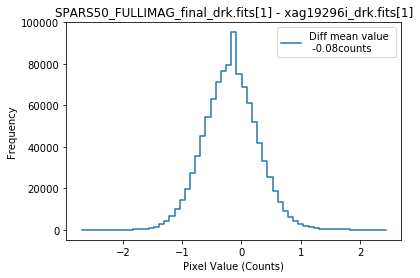

('Difference mean', -0.083366126)
('Difference STDDEV', 0.86933428)
('Difference Median', -0.085338593)
('Difference Max', 259.55615)
('Difference Min', -349.80933)



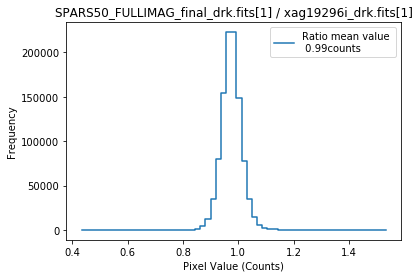

('Ratio mean', 0.99430251)
('Ratio STDDEV', 0.18625566)
('Ratio Median', 0.99321628)
('Ratio Max', 161.69891)
('Ratio Min', -8.8662729)


subtract (SPARS50_FULLIMAG_final_drk.fits[6] - xag19296i_drk.fits[6])
ratio (SPARS50_FULLIMAG_final_drk.fits[6] / xag19296i_drk.fits[6])

Applying DQ mask


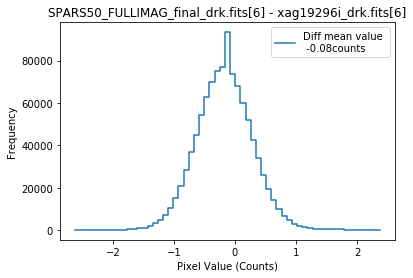

('Difference mean', -0.080629446)
('Difference STDDEV', 0.84412116)
('Difference Median', -0.081884384)
('Difference Max', 296.02832)
('Difference Min', -328.06989)



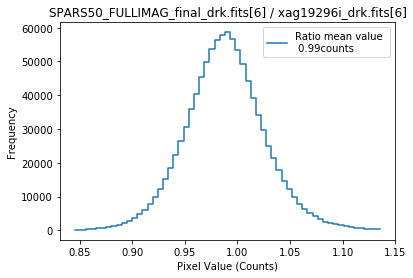

('Ratio mean', 0.99388123)
('Ratio STDDEV', 0.049042653)
('Ratio Median', 0.99292594)
('Ratio Max', 7.2326436)
('Ratio Min', -12.338302)


subtract (SPARS50_FULLIMAG_final_drk.fits[11] - xag19296i_drk.fits[11])
ratio (SPARS50_FULLIMAG_final_drk.fits[11] / xag19296i_drk.fits[11])

Applying DQ mask


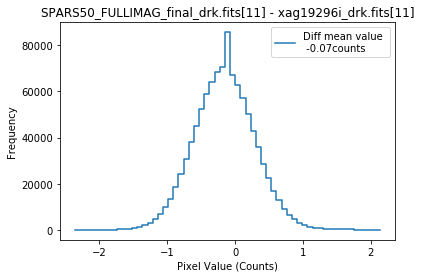

('Difference mean', -0.074526809)
('Difference STDDEV', 0.76036)
('Difference Median', -0.075270653)
('Difference Max', 55.239197)
('Difference Min', -297.65851)



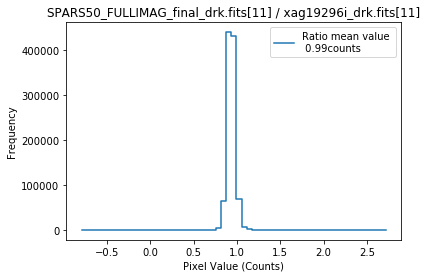

('Ratio mean', 0.99323356)
('Ratio STDDEV', 0.59532768)
('Ratio Median', 0.99286097)
('Ratio Max', 65.470589)
('Ratio Min', -500.95801)


subtract (SPARS50_FULLIMAG_final_drk.fits[16] - xag19296i_drk.fits[16])
ratio (SPARS50_FULLIMAG_final_drk.fits[16] / xag19296i_drk.fits[16])

Applying DQ mask


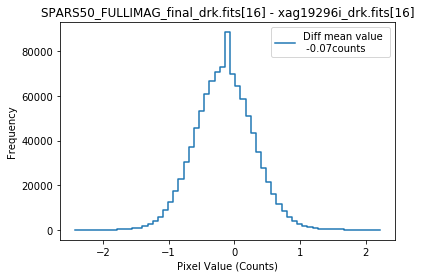

('Difference mean', -0.066331014)
('Difference STDDEV', 0.78479177)
('Difference Median', -0.06627655)
('Difference Max', 296.02734)
('Difference Min', -273.52356)



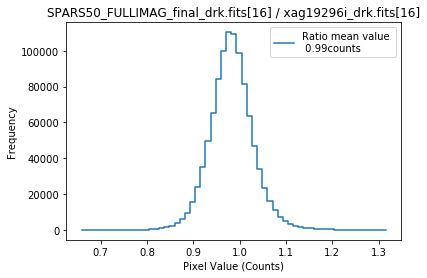

('Ratio mean', 0.99424034)
('Ratio STDDEV', 0.11142091)
('Ratio Median', 0.99295467)
('Ratio Max', 36.072792)
('Ratio Min', -56.917198)


subtract (SPARS50_FULLIMAG_final_drk.fits[21] - xag19296i_drk.fits[21])
ratio (SPARS50_FULLIMAG_final_drk.fits[21] / xag19296i_drk.fits[21])

Applying DQ mask


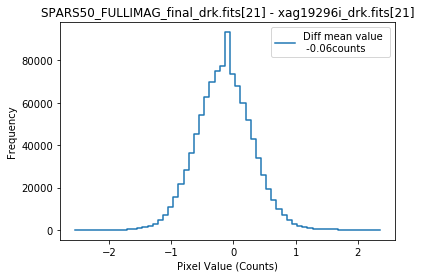

('Difference mean', -0.055054843)
('Difference STDDEV', 0.82883102)
('Difference Median', -0.054225922)
('Difference Max', 481.50195)
('Difference Min', -245.12369)



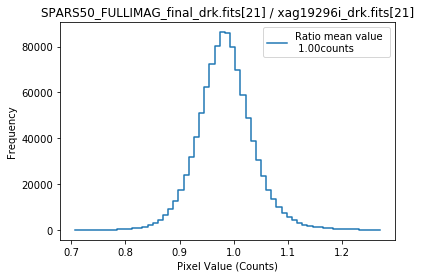

('Ratio mean', 0.99518007)
('Ratio STDDEV', 0.095386833)
('Ratio Median', 0.99340522)
('Ratio Max', 59.724628)
('Ratio Min', -22.315989)


subtract (SPARS50_FULLIMAG_final_drk.fits[26] - xag19296i_drk.fits[26])
ratio (SPARS50_FULLIMAG_final_drk.fits[26] / xag19296i_drk.fits[26])

Applying DQ mask


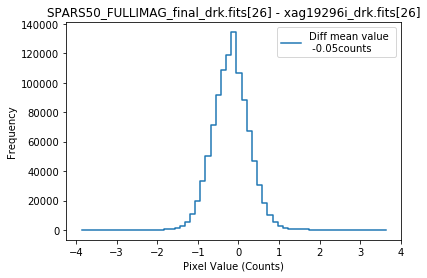

('Difference mean', -0.04986706)
('Difference STDDEV', 1.2719595)
('Difference Median', -0.048717976)
('Difference Max', 1106.313)
('Difference Min', -226.12904)



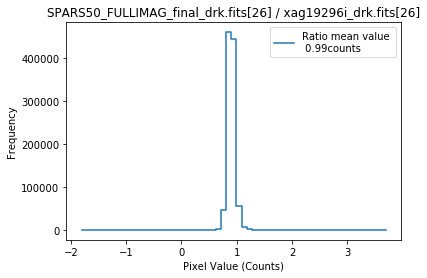

('Ratio mean', 0.99481785)
('Ratio STDDEV', 0.93220031)
('Ratio Median', 0.99323905)
('Ratio Max', 244.14798)
('Ratio Min', -899.84546)


subtract (SPARS50_FULLIMAG_final_drk.fits[31] - xag19296i_drk.fits[31])
ratio (SPARS50_FULLIMAG_final_drk.fits[31] / xag19296i_drk.fits[31])

Applying DQ mask


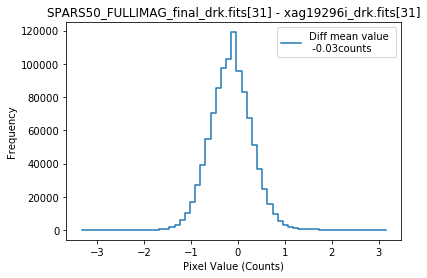

('Difference mean', -0.033944167)
('Difference STDDEV', 1.0985818)
('Difference Median', -0.031856537)
('Difference Max', 928.5769)
('Difference Min', -205.74396)



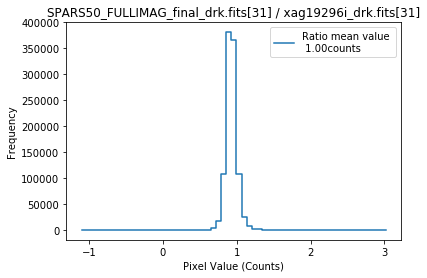

('Ratio mean', 0.99691367)
('Ratio STDDEV', 0.69886398)
('Ratio Median', 0.99445808)
('Ratio Max', 115.70089)
('Ratio Min', -614.99255)


subtract (SPARS50_FULLIMAG_final_drk.fits[36] - xag19296i_drk.fits[36])
ratio (SPARS50_FULLIMAG_final_drk.fits[36] / xag19296i_drk.fits[36])

Applying DQ mask


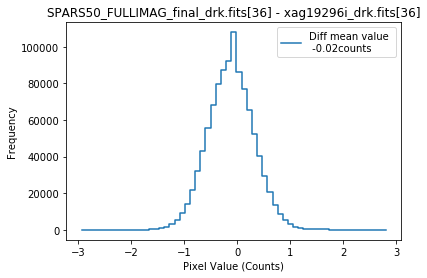

('Difference mean', -0.017460061)
('Difference STDDEV', 0.97245848)
('Difference Median', -0.01465416)
('Difference Max', 793.30469)
('Difference Min', -189.46579)



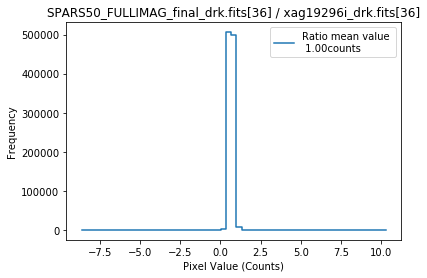

('Ratio mean', 0.9988122)
('Ratio STDDEV', 3.2068617)
('Ratio Median', 0.99612576)
('Ratio Max', 629.00122)
('Ratio Min', -2427.1416)


subtract (SPARS50_FULLIMAG_final_drk.fits[41] - xag19296i_drk.fits[41])
ratio (SPARS50_FULLIMAG_final_drk.fits[41] / xag19296i_drk.fits[41])

Applying DQ mask


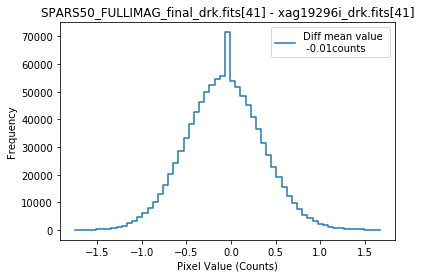

('Difference mean', -0.014136258)
('Difference STDDEV', 0.57838476)
('Difference Median', -0.010764599)
('Difference Max', 227.10986)
('Difference Min', -150.89865)



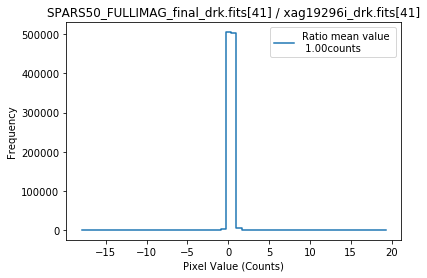

('Ratio mean', 1.0008632)
('Ratio STDDEV', 6.3200684)
('Ratio Median', 0.99585259)
('Ratio Max', 2542.9504)
('Ratio Min', -4522.3135)


subtract (SPARS50_FULLIMAG_final_drk.fits[46] - xag19296i_drk.fits[46])
ratio (SPARS50_FULLIMAG_final_drk.fits[46] / xag19296i_drk.fits[46])

Applying DQ mask


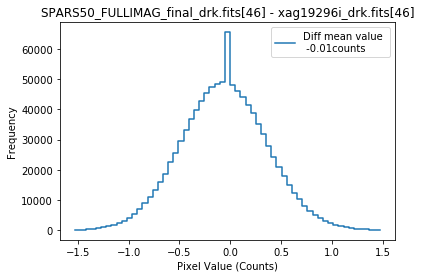

('Difference mean', -0.007545854)
('Difference STDDEV', 0.50719917)
('Difference Median', -0.0027182102)
('Difference Max', 33.998016)
('Difference Min', -124.16467)



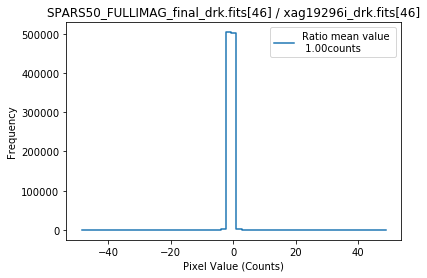

('Ratio mean', 1.0041429)
('Ratio STDDEV', 16.520172)
('Ratio Median', 0.99544477)
('Ratio Max', 4356.373)
('Ratio Min', -8345.1377)


subtract (SPARS50_FULLIMAG_final_drk.fits[51] - xag19296i_drk.fits[51])
ratio (SPARS50_FULLIMAG_final_drk.fits[51] / xag19296i_drk.fits[51])

Applying DQ mask


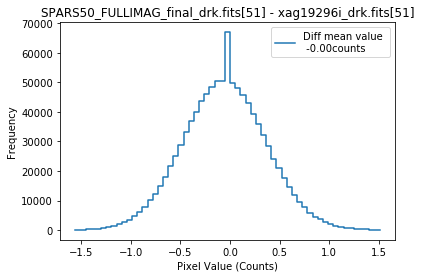

('Difference mean', -0.00047392349)
('Difference STDDEV', 0.51965332)
('Difference Median', 0.0)
('Difference Max', 40.874283)
('Difference Min', -216.1499)



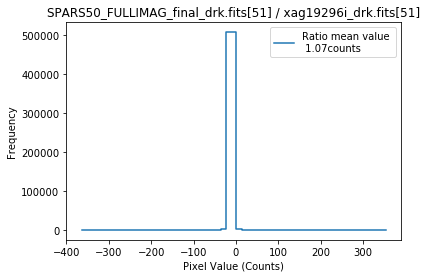

('Ratio mean', 1.0687957)
('Ratio STDDEV', 121.63688)
('Ratio Median', 0.99150234)
('Ratio Max', 107965.86)
('Ratio Min', -54839.969)


subtract (SPARS50_FULLIMAG_final_drk.fits[56] - xag19296i_drk.fits[56])
ratio (SPARS50_FULLIMAG_final_drk.fits[56] / xag19296i_drk.fits[56])

Applying DQ mask


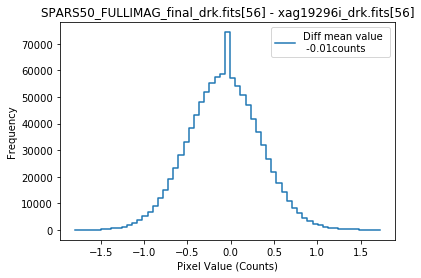

('Difference mean', -0.013550499)
('Difference STDDEV', 0.59584671)
('Difference Median', -0.0068660975)
('Difference Max', 58.662201)
('Difference Min', -395.39514)



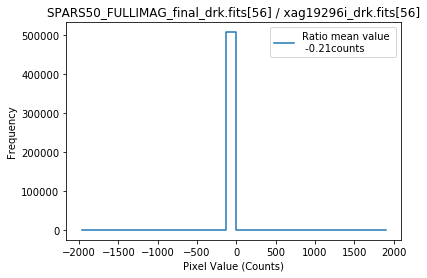

('Ratio mean', -0.21202807)
('Ratio STDDEV', 656.24591)
('Ratio Median', 0.96556997)
('Ratio Max', 234902.28)
('Ratio Min', -125499.83)


subtract (SPARS50_FULLIMAG_final_drk.fits[61] - xag19296i_drk.fits[61])
ratio (SPARS50_FULLIMAG_final_drk.fits[61] / xag19296i_drk.fits[61])

Applying DQ mask


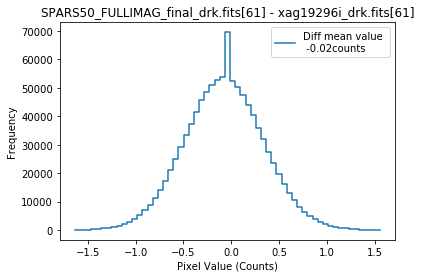

('Difference mean', -0.019283144)
('Difference STDDEV', 0.53946179)
('Difference Median', -0.012380809)
('Difference Max', 55.498215)
('Difference Min', -269.43359)



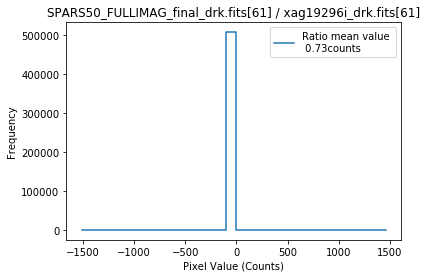

('Ratio mean', 0.73421228)
('Ratio STDDEV', 504.05081)
('Ratio Median', 0.94622433)
('Ratio Max', 323699.5)
('Ratio Min', -375535.59)


subtract (SPARS50_FULLIMAG_final_drk.fits[66] - xag19296i_drk.fits[66])
ratio (SPARS50_FULLIMAG_final_drk.fits[66] / xag19296i_drk.fits[66])

Applying DQ mask


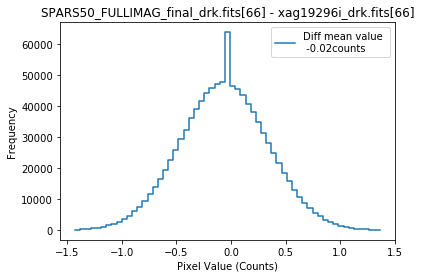

('Difference mean', -0.016770514)
('Difference STDDEV', 0.47257942)
('Difference Median', -0.009216696)
('Difference Max', 56.39325)
('Difference Min', -153.92358)



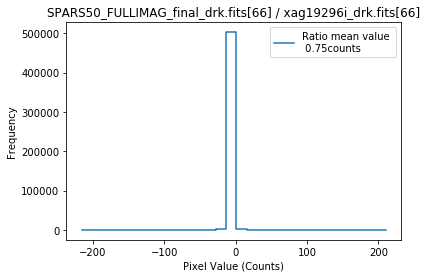

('Ratio mean', 0.7517724)
('Ratio STDDEV', 72.296196)
('Ratio Median', 0.98641008)
('Ratio Max', 24247.719)
('Ratio Min', -42968.062)


subtract (SPARS50_FULLIMAG_final_drk.fits[71] - xag19296i_drk.fits[71])
ratio (SPARS50_FULLIMAG_final_drk.fits[71] / xag19296i_drk.fits[71])

Applying DQ mask


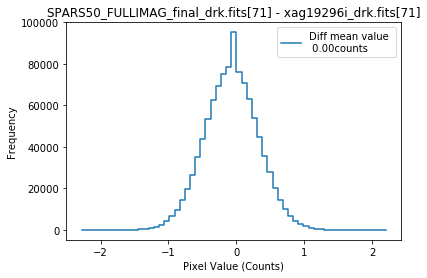

('Difference mean', 0.0039267382)
('Difference STDDEV', 0.75923604)
('Difference Median', 0.0)
('Difference Max', 595.37939)
('Difference Min', -231.66431)



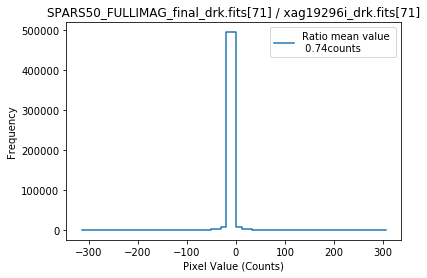

('Ratio mean', 0.74437273)
('Ratio STDDEV', 105.25172)
('Ratio Median', 0.75991005)
('Ratio Max', 55786.309)
('Ratio Min', -83497.391)


subtract (SPARS50_FULLIMAG_final_drk.fits[76] - xag19296i_drk.fits[76])
ratio (SPARS50_FULLIMAG_final_drk.fits[76] / xag19296i_drk.fits[76])

Applying DQ mask


ValueError: range parameter must be finite.

In [112]:
#Takes the difference and ratio of all science extensions 
for i in range(1,79,5):
    check_ratio_diff_histograms(new_drk ='SPARS50_FULLIMAG_final_drk.fits', crds_drk='xag19296i_drk.fits', ext_type = 'sci', ext = i, dqmask = True)
    
    

In [ ]:
#Takes the difference and ratio of all science extensions
for i in range(2,79,5):
    check_ratio_diff_histograms(new_drk ='SPARS50_FULLIMAG_final_drk.fits', crds_drk='xag19296i_drk.fits', ext_type = 'err', ext = i, dqmask = True) 
    
    

## 4.1.4.2: Compare histograms, read by read

In [132]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/plot_dualhistogram_gensize.py ./')     


0

In [139]:
%run /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/plot_dualhistogram_gensize.py "SPARS50_FULLIMAG_final_drk.fits" "xag19296i_drk.fits" 'sci' "-50" "50" "200"

SPARS50_FULLIMAG_final_drk.fits xag19296i_drk.fits sci -50 50 200
----------------------------READ 1 of 16----------------------------


KeyboardInterrupt: 

In [165]:
def compare_hist(new_drk, crds_drk, ext, ext_type, dq_mask):

    #sci=16
    #dq=sci+2
    
    if ext_type == 'sci':
        dq = ext + 2  
    
    elif ext_type == 'err':
        dq = ext + 1
        
    else:
        dq = ext
    
    new_file = fits.open(new_drk)
    old_file = fits .open(crds_drk)
    
    newsci_ext = new_file[ext].data
    oldsci_ext = old_file[ext].data
   
    
    if dq_mask == True:
        print('Appllying DQ Mask')
        newdq_ext =  new_file[dq].data
        olddq_ext =  old_file[dq].data
        newsci_ext[newdq_ext != 0] = np.nan
        oldsci_ext[olddq_ext != 0] = np.nan
        
    else:
        print('Not applying DQ Mask')
    
    sig_old1 = np.nanstd(oldsci_ext); med_old1 = np.nanmedian(oldsci_ext); h_old1, b_old1 = np.histogram(oldsci_ext[~np.isnan(oldsci_ext)],range=[med_old1-4*sig_old1,med_old1+4*sig_old1],bins=60)
    sig_new1 = np.nanstd(newsci_ext); med_new1 = np.nanmedian(newsci_ext); h_new1, b_new1 = np.histogram(newsci_ext[~np.isnan(newsci_ext)],range=[med_new1-4*sig_new1,med_new1+4*sig_new1],bins=60)
    mean_old1 = np.nanmean(oldsci_ext)
    mean_new1 = np.nanmean(newsci_ext)
    
    plt.step(b_old1[:-1],h_old1,label='CRDS Ref mean {}counts'.format("%.2f" % mean_old1))
    plt.step(b_new1[:-1],h_new1,label='New Ref mean {}counts'.format("%.2f" % mean_new1))
    plt.ylabel('Frequency')
    plt.xlabel('Pixel Value (electrons)')
    plt.title('{}[{}] & {}[{}]'.format(new_drk, ext, crds_drk, ext))
    #plt.step(b_diff1[:-1],h_diff1)
    plt.legend()
    plt.savefig('chip1_scidq_hist.png')
    plt.show()
    plt.clf()
    new_file.close()
    old_file.close()
    
    print('New mean' ,np.nanmean(newsci_ext))
    print('New STDDEV', np.nanstd(newsci_ext))
    print('New Median', np.nanmedian(newsci_ext))
    print('New Max', np.nanmax(newsci_ext))
    print('New Min', np.nanmin(newsci_ext))
    print()
    
    print('Old mean',np.nanmean(oldsci_ext))
    print('Old STDDEV', np.nanstd(oldsci_ext))
    print('Old Median', np.nanmedian(oldsci_ext))
    print('Old Max', np.nanmax(oldsci_ext))
    print('Old Min', np.nanmin(oldsci_ext))

Not applying DQ Mask


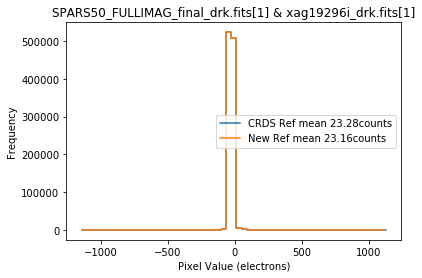

('New mean', 23.155748)
('New STDDEV', 287.3985)
('New Median', 13.02467)
('New Max', 20602.889)
('New Min', -2684.438)
()
('Old mean', 23.27986)
('Old STDDEV', 288.76944)
('Old Median', 13.124226)
('Old Max', 20603.469)
('Old Min', -2687.9375)
Not applying DQ Mask


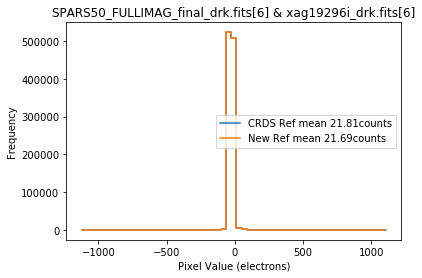

('New mean', 21.693661)
('New STDDEV', 282.65018)
('New Median', 12.011011)
('New Max', 20600.486)
('New Min', -2691.9185)
()
('Old mean', 21.809711)
('Old STDDEV', 283.75311)
('Old Median', 12.109077)
('Old Max', 20600.732)
('Old Min', -2687.8743)
Not applying DQ Mask


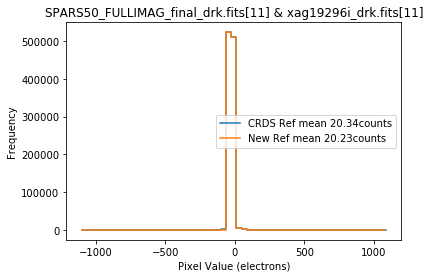

('New mean', 20.230871)
('New STDDEV', 277.39563)
('New Median', 11.011129)
('New Max', 20597.246)
('New Min', -2695.9094)
()
('Old mean', 20.344437)
('Old STDDEV', 278.63141)
('Old Median', 11.099148)
('Old Max', 20602.504)
('Old Min', -2694.7197)
Not applying DQ Mask


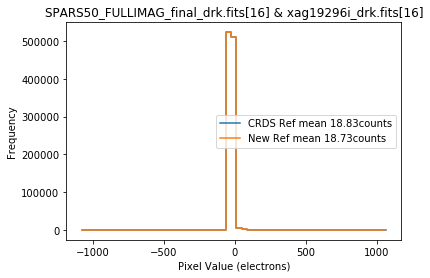

('New mean', 18.731243)
('New STDDEV', 271.54477)
('New Median', 9.9925003)
('New Max', 20602.584)
('New Min', -2692.021)
()
('Old mean', 18.831833)
('Old STDDEV', 272.53848)
('Old Median', 10.069468)
('Old Max', 20599.957)
('Old Min', -2691.1804)
Not applying DQ Mask


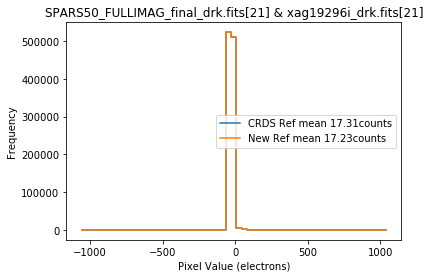

('New mean', 17.226669)
('New STDDEV', 265.78561)
('New Median', 8.9729128)
('New Max', 20598.941)
('New Min', -2688.7495)
()
('Old mean', 17.311783)
('Old STDDEV', 266.66275)
('Old Median', 9.0392532)
('Old Max', 20597.85)
('Old Min', -2689.8706)
Not applying DQ Mask


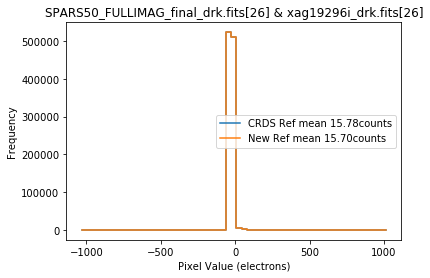

('New mean', 15.698845)
('New STDDEV', 259.17456)
('New Median', 7.9539342)
('New Max', 20603.859)
('New Min', -2678.7114)
()
('Old mean', 15.778162)
('Old STDDEV', 260.08057)
('Old Median', 8.0168705)
('Old Max', 20602.178)
('Old Min', -2679.9702)
Not applying DQ Mask


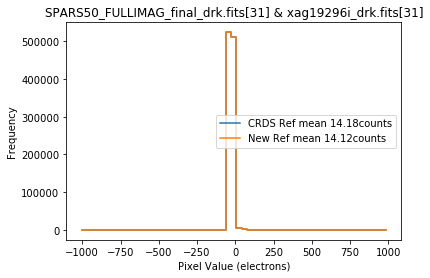

('New mean', 14.123046)
('New STDDEV', 252.12637)
('New Median', 6.8966775)
('New Max', 20600.457)
('New Min', -2674.6912)
()
('Old mean', 14.181373)
('Old STDDEV', 252.76581)
('Old Median', 6.9387145)
('Old Max', 20597.936)
('Old Min', -2674.0405)
Not applying DQ Mask


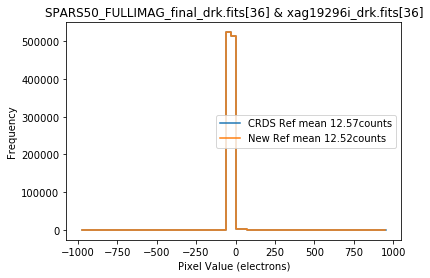

('New mean', 12.522196)
('New STDDEV', 244.29321)
('New Median', 5.8355656)
('New Max', 20591.844)
('New Min', -2659.3354)
()
('Old mean', 12.574116)
('Old STDDEV', 245.29425)
('Old Median', 5.8614774)
('Old Max', 20592.453)
('Old Min', -2656.5635)
Not applying DQ Mask


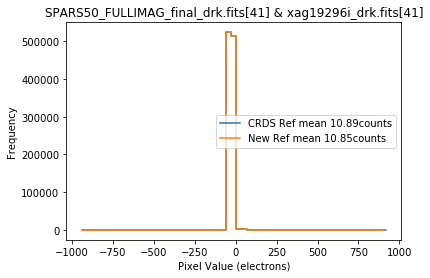

('New mean', 10.846116)
('New STDDEV', 235.43054)
('New Median', 4.7228327)
('New Max', 20556.373)
('New Min', -2633.6052)
()
('Old mean', 10.892179)
('Old STDDEV', 236.30592)
('Old Median', 4.7446895)
('Old Max', 20558.797)
('Old Min', -2639.4199)
Not applying DQ Mask


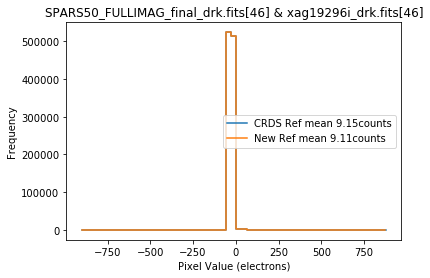

('New mean', 9.1078653)
('New STDDEV', 225.18958)
('New Median', 3.5871348)
('New Max', 20382.459)
('New Min', -2592.0757)
()
('Old mean', 9.152338)
('Old STDDEV', 226.26212)
('Old Median', 3.597883)
('Old Max', 20386.936)
('Old Min', -2639.5984)
Not applying DQ Mask


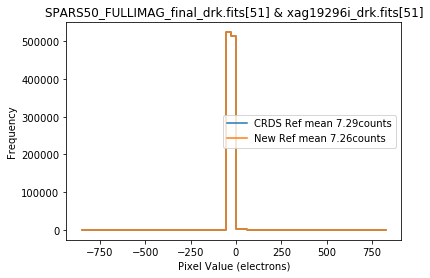

('New mean', 7.2619653)
('New STDDEV', 212.84744)
('New Median', 2.3821392)
('New Max', 19915.045)
('New Min', -2584.4492)
()
('Old mean', 7.2894964)
('Old STDDEV', 213.3896)
('Old Median', 2.3860507)
('Old Max', 19921.586)
('Old Min', -2637.0686)
Not applying DQ Mask


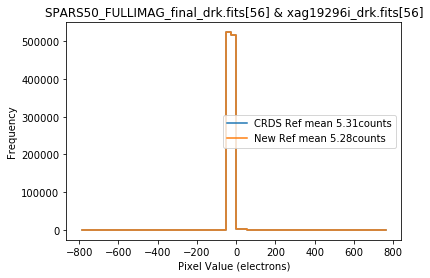

('New mean', 5.278348)
('New STDDEV', 197.0368)
('New Median', 1.1028444)
('New Max', 19894.004)
('New Min', -2567.9363)
()
('Old mean', 5.3068542)
('Old STDDEV', 197.13026)
('Old Median', 1.1181885)
('Old Max', 19900.506)
('Old Min', -2618.1316)
Not applying DQ Mask


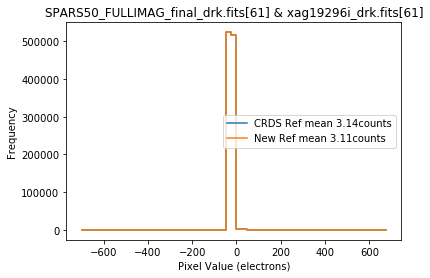

('New mean', 3.1129239)
('New STDDEV', 174.59125)
('New Median', -0.1738489)
('New Max', 19577.104)
('New Min', -2531.8442)
()
('Old mean', 3.1429033)
('Old STDDEV', 174.71985)
('Old Median', -0.15138769)
('Old Max', 19574.615)
('Old Min', -2565.7319)
Not applying DQ Mask


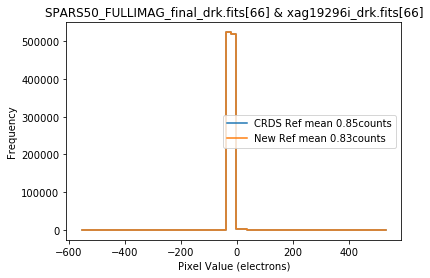

('New mean', 0.83143473)
('New STDDEV', 138.1317)
('New Median', -1.4201939)
('New Max', 17847.963)
('New Min', -2331.6624)
()
('Old mean', 0.85382563)
('Old STDDEV', 138.17883)
('Old Median', -1.4011705)
('Old Max', 17848.633)
('Old Min', -2352.5671)
Not applying DQ Mask


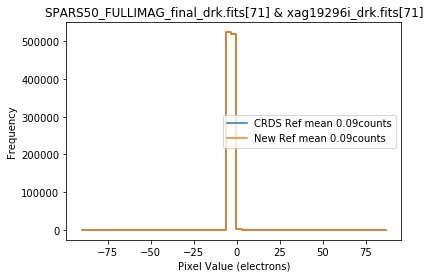

('New mean', 0.090882964)
('New STDDEV', 22.445705)
('New Median', -0.13799641)
('New Max', 5861.7769)
('New Min', -614.68634)
()
('Old mean', 0.087350808)
('Old STDDEV', 22.48704)
('Old Median', -0.14057058)
('Old Max', 5861.8403)
('Old Min', -608.48987)
Not applying DQ Mask


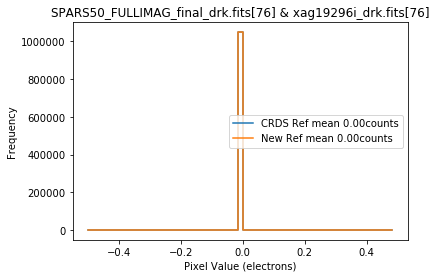

('New mean', 0.0)
('New STDDEV', 0.0)
('New Median', 0.0)
('New Max', 0.0)
('New Min', 0.0)
()
('Old mean', 0.0)
('Old STDDEV', 0.0)
('Old Median', 0.0)
('Old Max', 0.0)
('Old Min', 0.0)


In [167]:
#Compare sci histograms (range +/- 4 * sigma)
for i in range(1,79,5):
    compare_hist(new_drk = 'SPARS50_FULLIMAG_final_drk.fits', crds_drk='xag19296i_drk.fits', ext=i, ext_type='sci', dq_mask = False)      
    

Appllying DQ Mask


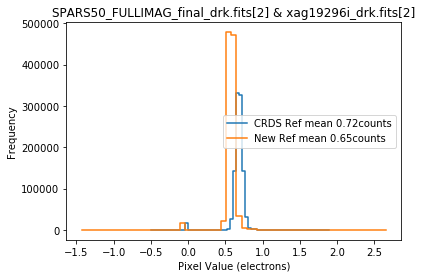

('New mean', 0.65202934)
('New STDDEV', 0.51945537)
('New Median', 0.64883983)
('New Max', 440.53989)
('New Min', 0.0)
()
('Old mean', 0.72422856)
('Old STDDEV', 0.3034955)
('Old Median', 0.72183931)
('Old Max', 123.46462)
('Old Min', 0.0)
Appllying DQ Mask


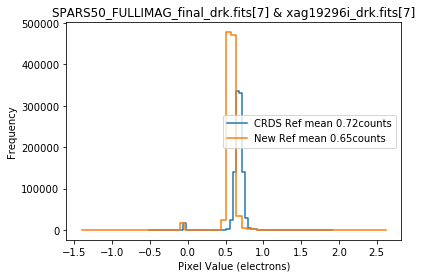

('New mean', 0.64727205)
('New STDDEV', 0.51204395)
('New Median', 0.64457273)
('New Max', 427.28287)
('New Min', 0.0)
()
('Old mean', 0.71891224)
('Old STDDEV', 0.30686355)
('Old Median', 0.71710694)
('Old Max', 148.87666)
('Old Min', 0.0)
Appllying DQ Mask


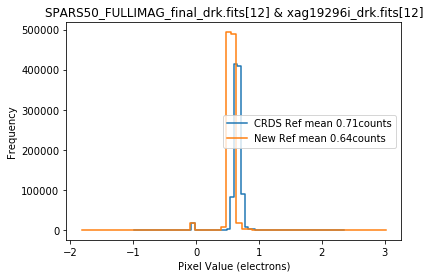

('New mean', 0.64258653)
('New STDDEV', 0.61540675)
('New Median', 0.64035362)
('New Max', 452.96875)
('New Min', 0.0)
()
('Old mean', 0.71357787)
('Old STDDEV', 0.42555028)
('Old Median', 0.7122162)
('Old Max', 341.00021)
('Old Min', 0.0)
Appllying DQ Mask


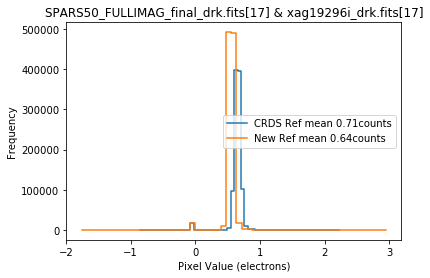

('New mean', 0.63733464)
('New STDDEV', 0.59844446)
('New Median', 0.63596475)
('New Max', 478.45663)
('New Min', 0.0)
()
('Old mean', 0.70762008)
('Old STDDEV', 0.39257565)
('Old Median', 0.70707089)
('Old Max', 294.92657)
('Old Min', 0.0)
Appllying DQ Mask


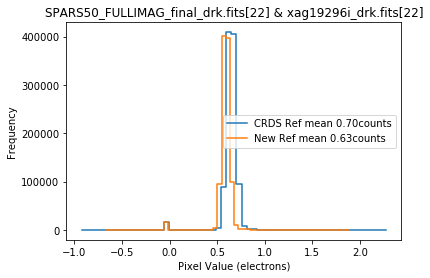

('New mean', 0.63199061)
('New STDDEV', 0.3240093)
('New Median', 0.63173044)
('New Max', 228.2227)
('New Min', 0.0)
()
('Old mean', 0.70213115)
('Old STDDEV', 0.40658495)
('Old Median', 0.70220673)
('Old Max', 260.19299)
('Old Min', 0.0)
Appllying DQ Mask


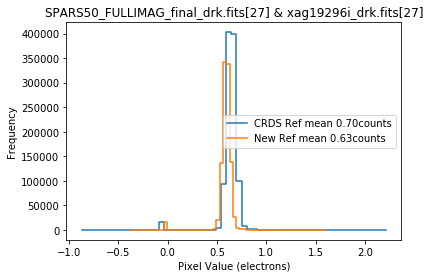

('New mean', 0.62675434)
('New STDDEV', 0.2508567)
('New Median', 0.62735939)
('New Max', 137.89473)
('New Min', 0.0)
()
('Old mean', 0.69634575)
('Old STDDEV', 0.39235133)
('Old Median', 0.69719511)
('Old Max', 236.20738)
('Old Min', 0.0)
Appllying DQ Mask


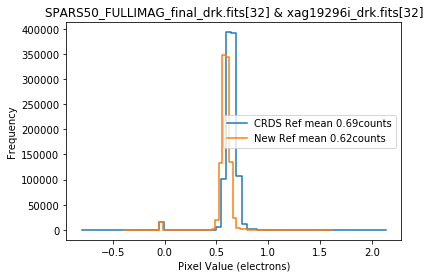

('New mean', 0.62186205)
('New STDDEV', 0.25334278)
('New Median', 0.62301081)
('New Max', 129.79247)
('New Min', 0.0)
()
('Old mean', 0.69074416)
('Old STDDEV', 0.37307256)
('Old Median', 0.69233757)
('Old Max', 227.35338)
('Old Min', 0.0)
Appllying DQ Mask


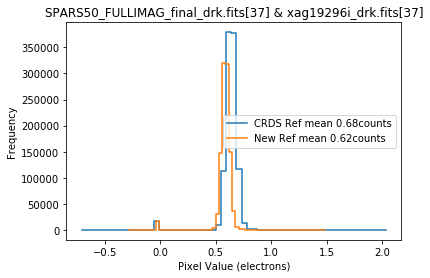

('New mean', 0.61666423)
('New STDDEV', 0.22430843)
('New Median', 0.61860621)
('New Max', 114.83955)
('New Min', 0.0)
()
('Old mean', 0.68498182)
('Old STDDEV', 0.34851113)
('Old Median', 0.68723965)
('Old Max', 214.41019)
('Old Min', 0.0)
Appllying DQ Mask


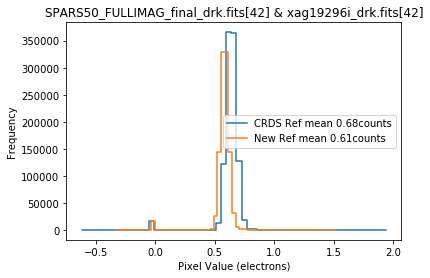

('New mean', 0.61160558)
('New STDDEV', 0.23161946)
('New Median', 0.61419845)
('New Max', 139.15912)
('New Min', 0.0)
()
('Old mean', 0.67917246)
('Old STDDEV', 0.32595482)
('Old Median', 0.68215775)
('Old Max', 195.11823)
('Old Min', 0.0)
Appllying DQ Mask


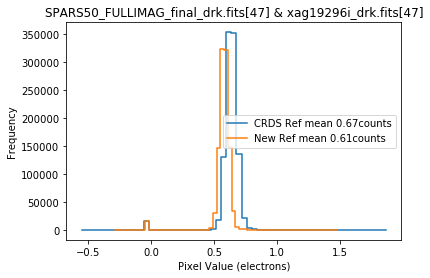

('New mean', 0.60655415)
('New STDDEV', 0.22321555)
('New Median', 0.60979688)
('New Max', 130.47586)
('New Min', 0.0)
()
('Old mean', 0.67338848)
('Old STDDEV', 0.30707511)
('Old Median', 0.67705429)
('Old Max', 183.21992)
('Old Min', 0.0)
Appllying DQ Mask


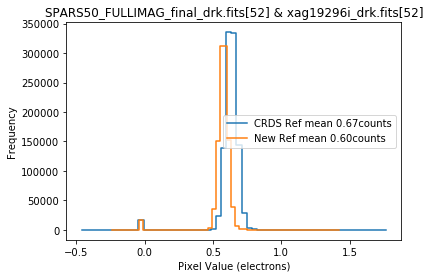

('New mean', 0.60145915)
('New STDDEV', 0.21081889)
('New Median', 0.60535926)
('New Max', 116.89662)
('New Min', 0.0)
()
('Old mean', 0.66761184)
('Old STDDEV', 0.28302509)
('Old Median', 0.67200422)
('Old Max', 177.39973)
('Old Min', 0.0)
Appllying DQ Mask


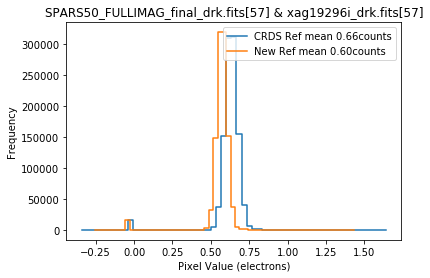

('New mean', 0.59633654)
('New STDDEV', 0.21446486)
('New Median', 0.60072064)
('New Max', 92.08075)
('New Min', 0.0)
()
('Old mean', 0.66175282)
('Old STDDEV', 0.25204495)
('Old Median', 0.66682708)
('Old Max', 153.78999)
('Old Min', 0.0)
Appllying DQ Mask


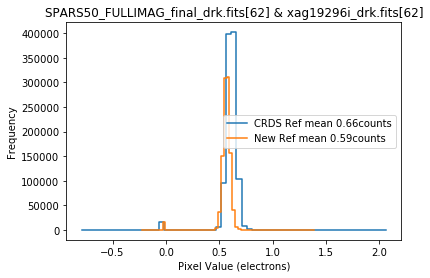

('New mean', 0.59084797)
('New STDDEV', 0.20439675)
('New Median', 0.59582698)
('New Max', 94.989838)
('New Min', 0.0)
()
('Old mean', 0.65590304)
('Old STDDEV', 0.36269164)
('Old Median', 0.66124058)
('Old Max', 286.75729)
('Old Min', 0.0)
Appllying DQ Mask


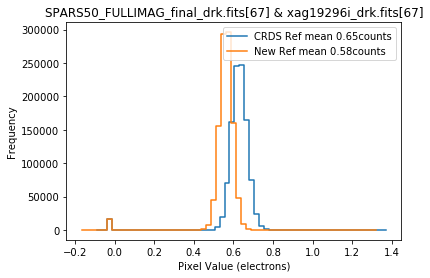

('New mean', 0.58418489)
('New STDDEV', 0.18914554)
('New Median', 0.58952141)
('New Max', 82.613937)
('New Min', 0.0)
()
('Old mean', 0.64817774)
('Old STDDEV', 0.18550184)
('Old Median', 0.65420783)
('Old Max', 75.73455)
('Old Min', 0.0)
Appllying DQ Mask


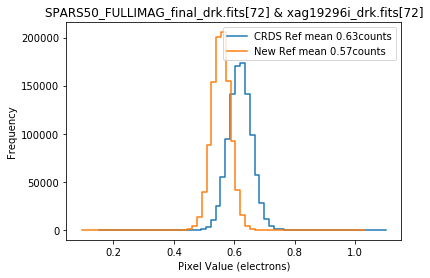

('New mean', 0.5652523)
('New STDDEV', 0.1192698)
('New Median', 0.57178319)
('New Max', 39.796043)
('New Min', 0.0)
()
('Old mean', 0.62716424)
('Old STDDEV', 0.12091224)
('Old Median', 0.63443792)
('Old Max', 29.83123)
('Old Min', 0.0)
Appllying DQ Mask


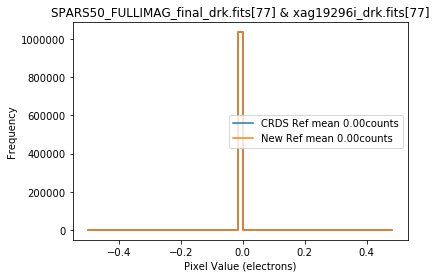

('New mean', 0.0)
('New STDDEV', 0.0)
('New Median', 0.0)
('New Max', 0.0)
('New Min', 0.0)
()
('Old mean', 0.0)
('Old STDDEV', 0.0)
('Old Median', 0.0)
('Old Max', 0.0)
('Old Min', 0.0)


In [168]:
#Compare err histograms (range +/- 4 * sigma)
for i in range(2,79,5):
    compare_hist(new_drk = 'SPARS50_FULLIMAG_final_drk.fits', crds_drk='xag19296i_drk.fits', ext=i, ext_type='err', dq_mask = True)      


Not applying DQ Mask


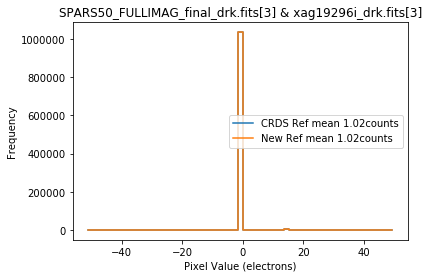

('New mean', 1.0187196731567383)
('New STDDEV', 12.78605757495653)
('New Median', 0.0)
('New Max', 560)
('New Min', 0)
()
('Old mean', 1.0181283950805664)
('Old STDDEV', 12.782206470072142)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


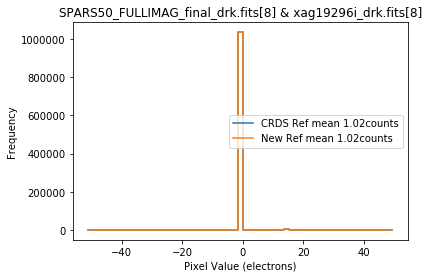

('New mean', 1.0184841156005859)
('New STDDEV', 12.782902757288339)
('New Median', 0.0)
('New Max', 560)
('New Min', 0)
()
('Old mean', 1.0176477432250977)
('Old STDDEV', 12.77599035961258)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


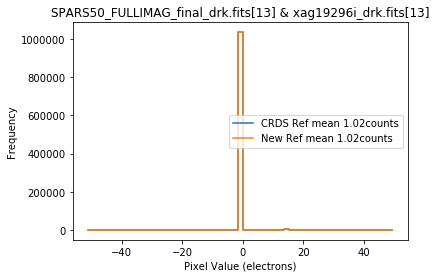

('New mean', 1.0172662734985352)
('New STDDEV', 12.766861869222137)
('New Median', 0.0)
('New Max', 560)
('New Min', 0)
()
('Old mean', 1.0166721343994141)
('Old STDDEV', 12.763242932617086)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


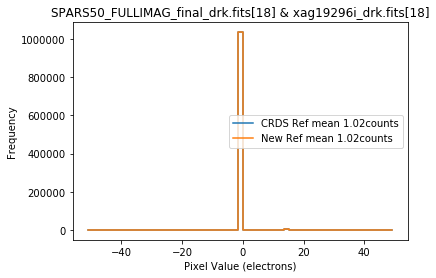

('New mean', 1.0157918930053711)
('New STDDEV', 12.74776542013351)
('New Median', 0.0)
('New Max', 560)
('New Min', 0)
()
('Old mean', 1.0154447555541992)
('Old STDDEV', 12.747886440353883)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


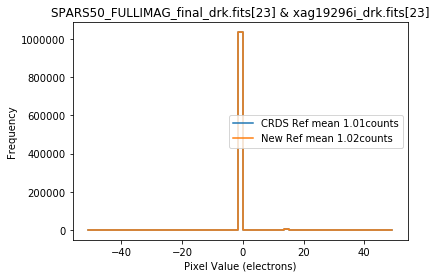

('New mean', 1.0150594711303711)
('New STDDEV', 12.737707727323455)
('New Median', 0.0)
('New Max', 560)
('New Min', 0)
()
('Old mean', 1.0147123336791992)
('Old STDDEV', 12.737828823140161)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


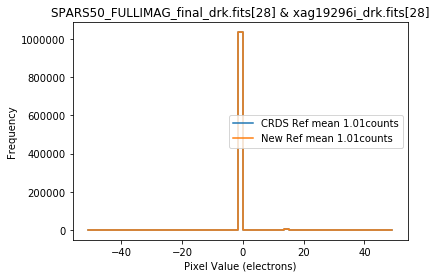

('New mean', 1.0138406753540039)
('New STDDEV', 12.720972645083481)
('New Median', 0.0)
('New Max', 560)
('New Min', 0)
()
('Old mean', 1.0132474899291992)
('Old STDDEV', 12.718303887385813)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


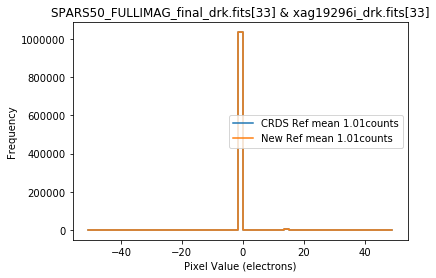

('New mean', 1.0121288299560547)
('New STDDEV', 12.697374071852851)
('New Median', 0.0)
('New Max', 560)
('New Min', 0)
()
('Old mean', 1.0120258331298828)
('Old STDDEV', 12.70147470466169)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


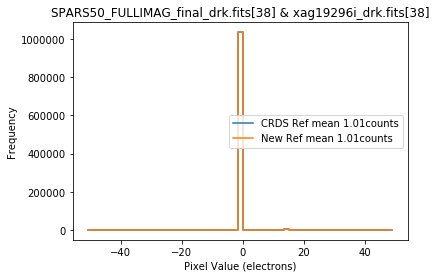

('New mean', 1.0099296569824219)
('New STDDEV', 12.667280372641921)
('New Median', 0.0)
('New Max', 560)
('New Min', 0)
()
('Old mean', 1.0098276138305664)
('Old STDDEV', 12.671143826141693)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


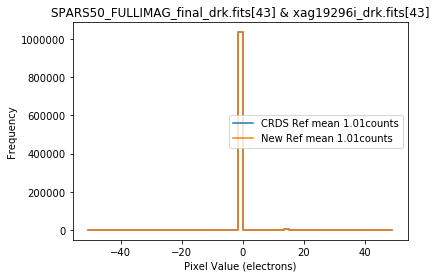

('New mean', 1.0094423294067383)
('New STDDEV', 12.662098736877379)
('New Median', 0.0)
('New Max', 560)
('New Min', 0)
()
('Old mean', 1.0095853805541992)
('Old STDDEV', 12.668432957139331)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


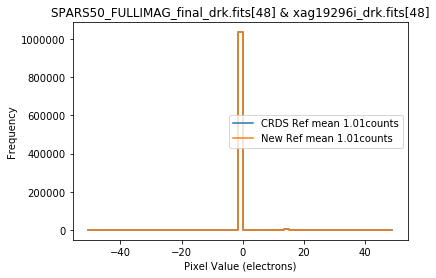

('New mean', 1.0074920654296875)
('New STDDEV', 12.636652078767728)
('New Median', 0.0)
('New Max', 560)
('New Min', 0)
()
('Old mean', 1.007634162902832)
('Old STDDEV', 12.644558322222053)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


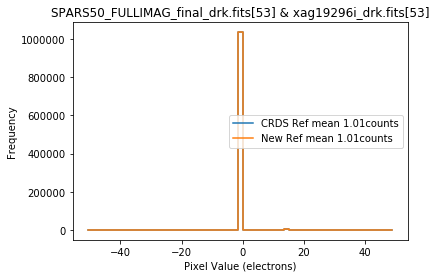

('New mean', 1.0065164566040039)
('New STDDEV', 12.624691439079678)
('New Median', 0.0)
('New Max', 560)
('New Min', 0)
()
('Old mean', 1.0061683654785156)
('Old STDDEV', 12.625486613914434)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


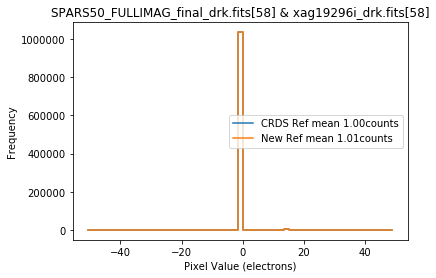

('New mean', 1.0060367584228516)
('New STDDEV', 12.634560007304474)
('New Median', 0.0)
('New Max', 817)
('New Min', 0)
()
('Old mean', 1.0047149658203125)
('Old STDDEV', 12.607919930540003)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


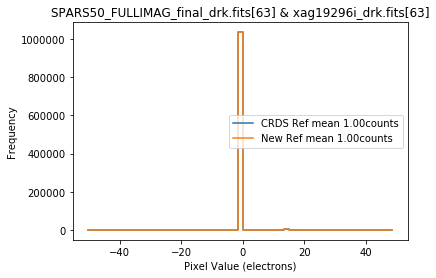

('New mean', 1.002873420715332)
('New STDDEV', 12.595417919122667)
('New Median', 0.0)
('New Max', 817)
('New Min', 0)
()
('Old mean', 1.0008182525634766)
('Old STDDEV', 12.559029372013915)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


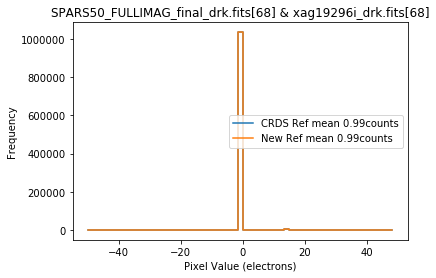

('New mean', 0.99210834503173828)
('New STDDEV', 12.453611651918415)
('New Median', 0.0)
('New Max', 561)
('New Min', 0)
()
('Old mean', 0.99102878570556641)
('Old STDDEV', 12.442045008491426)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


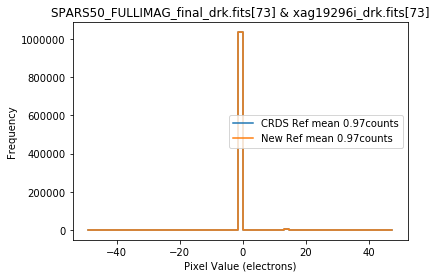

('New mean', 0.97476291656494141)
('New STDDEV', 12.26591373375156)
('New Median', 0.0)
('New Max', 560)
('New Min', 0)
()
('Old mean', 0.97418212890625)
('Old STDDEV', 12.266634062396061)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)
Not applying DQ Mask


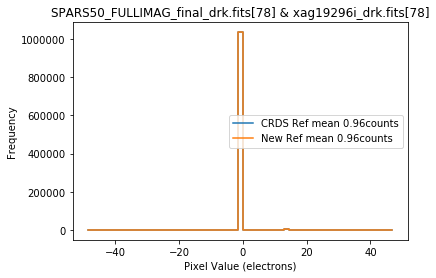

('New mean', 0.960845947265625)
('New STDDEV', 12.119623643615705)
('New Median', 0.0)
('New Max', 560)
('New Min', 0)
()
('Old mean', 0.96051025390625)
('Old STDDEV', 12.123577734858493)
('Old Median', 0.0)
('Old Max', 560)
('Old Min', 0)


In [169]:
#Compare dq histograms (range +/- 4 * sigma)
for i in range(3,79,5):
    compare_hist(new_drk = 'SPARS50_FULLIMAG_final_drk.fits', crds_drk='xag19296i_drk.fits', ext=i, ext_type='dq', dq_mask = False)      


Not applying DQ Mask


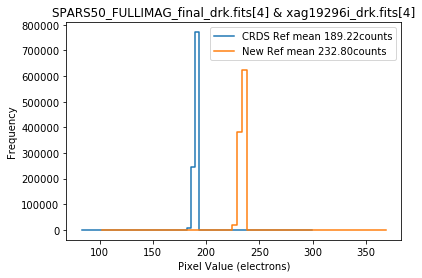

('New mean', 232.80028)
('New STDDEV', 33.820259)
('New Median', 238.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 189.22134)
('Old STDDEV', 27.431898)
('Old Median', 193.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


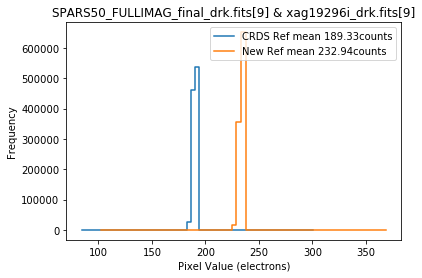

('New mean', 232.93759)
('New STDDEV', 33.812862)
('New Median', 238.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 189.33464)
('Old STDDEV', 27.425413)
('Old Median', 194.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


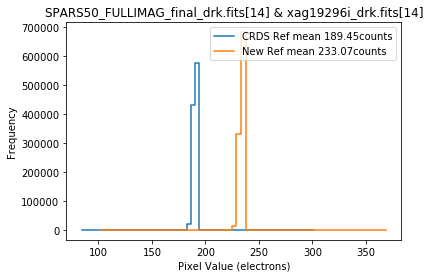

('New mean', 233.07446)
('New STDDEV', 33.804844)
('New Median', 238.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 189.44754)
('Old STDDEV', 27.418091)
('Old Median', 194.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


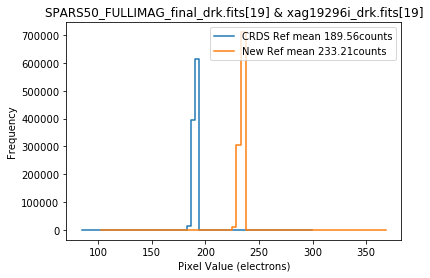

('New mean', 233.21352)
('New STDDEV', 33.794121)
('New Median', 238.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 189.56143)
('Old STDDEV', 27.408567)
('Old Median', 194.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


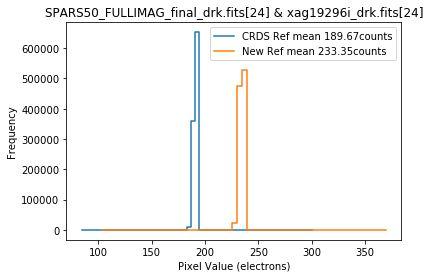

('New mean', 233.35211)
('New STDDEV', 33.782093)
('New Median', 239.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 189.6749)
('Old STDDEV', 27.398256)
('Old Median', 194.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


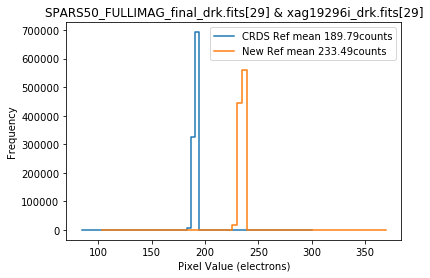

('New mean', 233.49211)
('New STDDEV', 33.768173)
('New Median', 239.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 189.78842)
('Old STDDEV', 27.387714)
('Old Median', 194.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


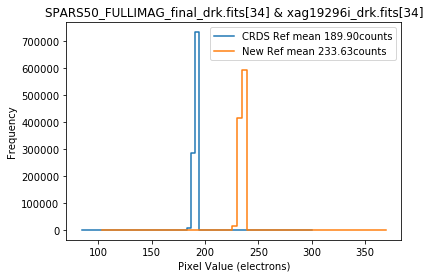

('New mean', 233.63354)
('New STDDEV', 33.753593)
('New Median', 239.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 189.90436)
('Old STDDEV', 27.374617)
('Old Median', 194.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


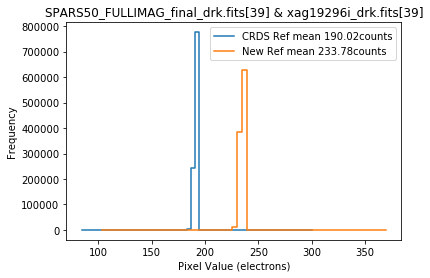

('New mean', 233.77602)
('New STDDEV', 33.738213)
('New Median', 239.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 190.0208)
('Old STDDEV', 27.362446)
('Old Median', 194.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


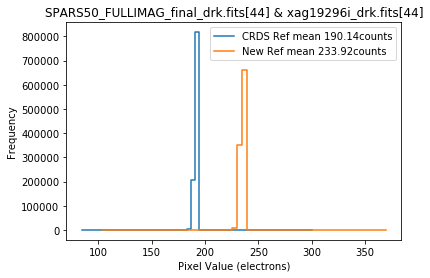

('New mean', 233.9194)
('New STDDEV', 33.71677)
('New Median', 239.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 190.13872)
('Old STDDEV', 27.343412)
('Old Median', 194.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


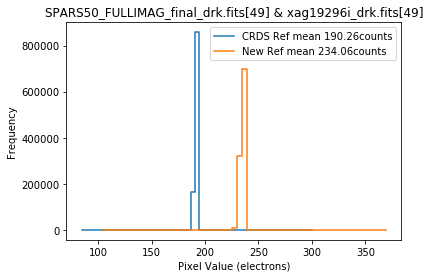

('New mean', 234.06346)
('New STDDEV', 33.698563)
('New Median', 239.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 190.25658)
('Old STDDEV', 27.329006)
('Old Median', 194.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


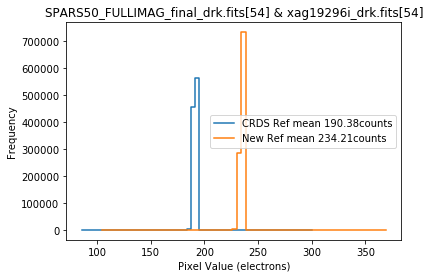

('New mean', 234.21045)
('New STDDEV', 33.682434)
('New Median', 239.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 190.37778)
('Old STDDEV', 27.315536)
('Old Median', 195.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


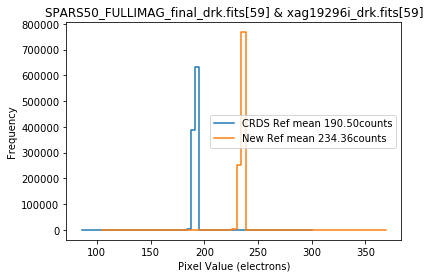

('New mean', 234.36281)
('New STDDEV', 33.662354)
('New Median', 239.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 190.50294)
('Old STDDEV', 27.298557)
('Old Median', 195.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


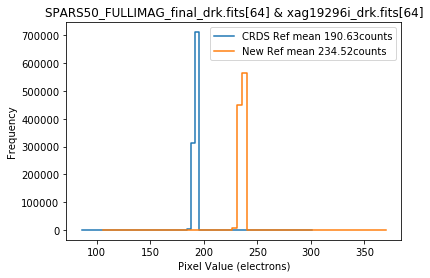

('New mean', 234.51985)
('New STDDEV', 33.651535)
('New Median', 240.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 190.63058)
('Old STDDEV', 27.291714)
('Old Median', 195.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


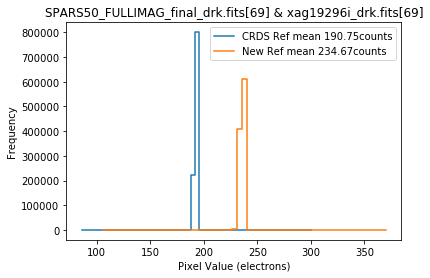

('New mean', 234.66843)
('New STDDEV', 33.678425)
('New Median', 240.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 190.75453)
('Old STDDEV', 27.302364)
('Old Median', 195.0)
('Old Max', 195.0)
('Old Min', 0.0)
Not applying DQ Mask


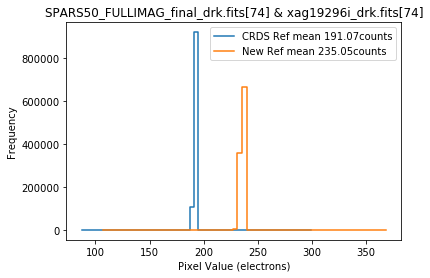

('New mean', 235.04607)
('New STDDEV', 33.20583)
('New Median', 240.0)
('New Max', 241.0)
('New Min', 0.0)
()
('Old mean', 191.06616)
('Old STDDEV', 26.920361)
('Old Median', 195.0)
('Old Max', 195.0)
('Old Min', 0.0)


In [174]:
#Compare samp histograms (range +/- 4 * sigma)
for i in range(4,79,5):
    compare_hist(new_drk = 'SPARS50_FULLIMAG_final_drk.fits', crds_drk='xag19296i_drk.fits', ext=i, ext_type='samp', dq_mask = False)      


Not applying DQ Mask


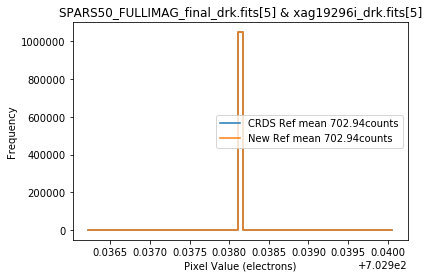

('New mean', 702.93768)
('New STDDEV', 0.00048828125)
('New Median', 702.93817)
('New Max', 702.93817)
('New Min', 702.93817)
()
('Old mean', 702.93768)
('Old STDDEV', 0.00048828125)
('Old Median', 702.93817)
('Old Max', 702.93817)
('Old Min', 702.93817)
Not applying DQ Mask


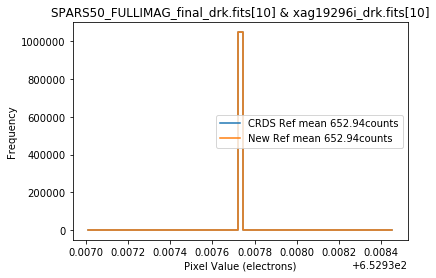

('New mean', 652.93756)
('New STDDEV', 0.00018310547)
('New Median', 652.93774)
('New Max', 652.93774)
('New Min', 652.93774)
()
('Old mean', 652.93756)
('Old STDDEV', 0.00018310547)
('Old Median', 652.93774)
('Old Max', 652.93774)
('Old Min', 652.93774)
Not applying DQ Mask


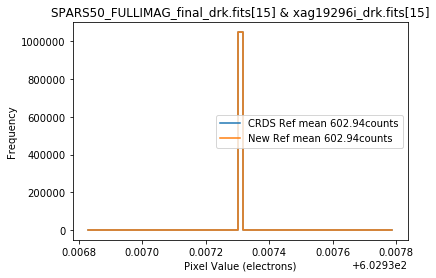

('New mean', 602.93744)
('New STDDEV', 0.00012207031)
('New Median', 602.93732)
('New Max', 602.93732)
('New Min', 602.93732)
()
('Old mean', 602.93744)
('Old STDDEV', 0.00012207031)
('Old Median', 602.93732)
('Old Max', 602.93732)
('Old Min', 602.93732)
Not applying DQ Mask


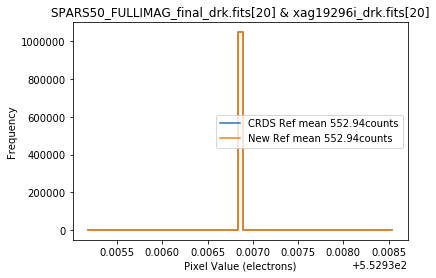

('New mean', 552.93732)
('New STDDEV', 0.00042724609)
('New Median', 552.93689)
('New Max', 552.93689)
('New Min', 552.93689)
()
('Old mean', 552.93732)
('Old STDDEV', 0.00042724609)
('Old Median', 552.93689)
('Old Max', 552.93689)
('Old Min', 552.93689)
Not applying DQ Mask


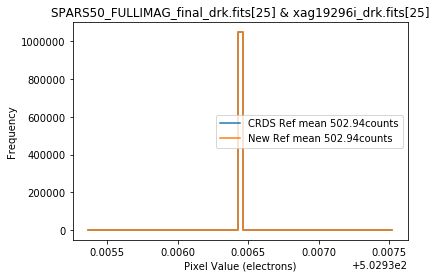

('New mean', 502.93674)
('New STDDEV', 0.0002746582)
('New Median', 502.93646)
('New Max', 502.93646)
('New Min', 502.93646)
()
('Old mean', 502.93674)
('Old STDDEV', 0.0002746582)
('Old Median', 502.93646)
('Old Max', 502.93646)
('Old Min', 502.93646)
Not applying DQ Mask


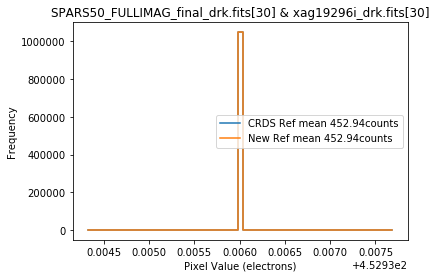

('New mean', 452.93646)
('New STDDEV', 0.00042724609)
('New Median', 452.93604)
('New Max', 452.93604)
('New Min', 452.93604)
()
('Old mean', 452.93646)
('Old STDDEV', 0.00042724609)
('Old Median', 452.93604)
('Old Max', 452.93604)
('Old Min', 452.93604)
Not applying DQ Mask


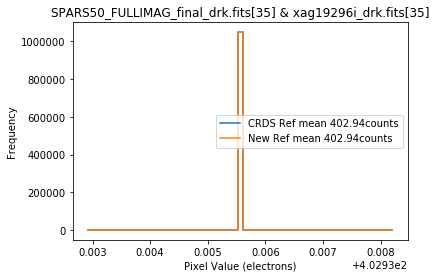

('New mean', 402.93628)
('New STDDEV', 0.00067138672)
('New Median', 402.93561)
('New Max', 402.93561)
('New Min', 402.93561)
()
('Old mean', 402.93628)
('Old STDDEV', 0.00067138672)
('Old Median', 402.93561)
('Old Max', 402.93561)
('Old Min', 402.93561)
Not applying DQ Mask


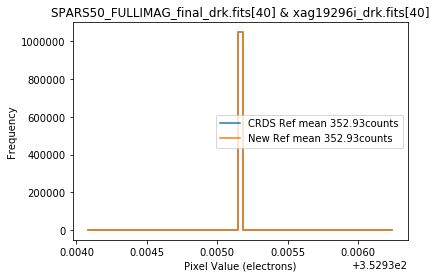

('New mean', 352.93491)
('New STDDEV', 0.0002746582)
('New Median', 352.93518)
('New Max', 352.93518)
('New Min', 352.93518)
()
('Old mean', 352.93491)
('Old STDDEV', 0.0002746582)
('Old Median', 352.93518)
('Old Max', 352.93518)
('Old Min', 352.93518)
Not applying DQ Mask


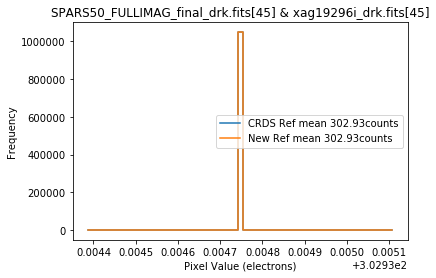

('New mean', 302.93484)
('New STDDEV', 9.1552734e-05)
('New Median', 302.93475)
('New Max', 302.93475)
('New Min', 302.93475)
()
('Old mean', 302.93484)
('Old STDDEV', 9.1552734e-05)
('Old Median', 302.93475)
('Old Max', 302.93475)
('Old Min', 302.93475)
Not applying DQ Mask


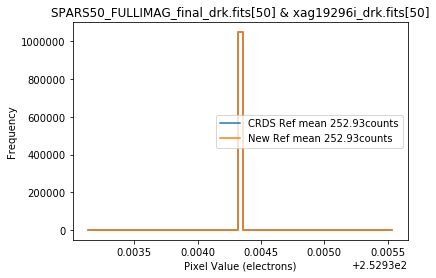

('New mean', 252.93405)
('New STDDEV', 0.00030517578)
('New Median', 252.93436)
('New Max', 252.93436)
('New Min', 252.93436)
()
('Old mean', 252.93405)
('Old STDDEV', 0.00030517578)
('Old Median', 252.93436)
('Old Max', 252.93436)
('Old Min', 252.93436)
Not applying DQ Mask


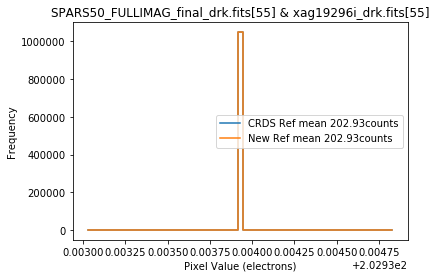

('New mean', 202.93372)
('New STDDEV', 0.00022888184)
('New Median', 202.93394)
('New Max', 202.93394)
('New Min', 202.93394)
()
('Old mean', 202.93372)
('Old STDDEV', 0.00022888184)
('Old Median', 202.93394)
('Old Max', 202.93394)
('Old Min', 202.93394)
Not applying DQ Mask


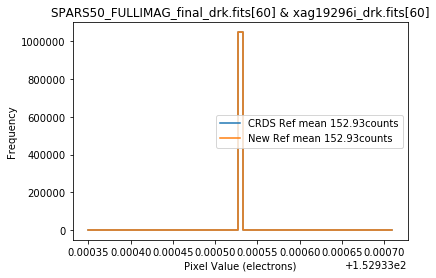

('New mean', 152.93358)
('New STDDEV', 4.5776367e-05)
('New Median', 152.93353)
('New Max', 152.93353)
('New Min', 152.93353)
()
('Old mean', 152.93358)
('Old STDDEV', 4.5776367e-05)
('Old Median', 152.93353)
('Old Max', 152.93353)
('Old Min', 152.93353)
Not applying DQ Mask


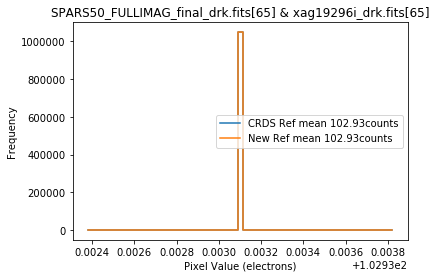

('New mean', 102.9333)
('New STDDEV', 0.00018310547)
('New Median', 102.93311)
('New Max', 102.93311)
('New Min', 102.93311)
()
('Old mean', 102.9333)
('Old STDDEV', 0.00018310547)
('Old Median', 102.93311)
('Old Max', 102.93311)
('Old Min', 102.93311)
Not applying DQ Mask


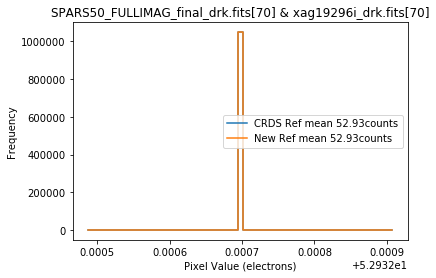

('New mean', 52.932648)
('New STDDEV', 5.3405762e-05)
('New Median', 52.932701)
('New Max', 52.932701)
('New Min', 52.932701)
()
('Old mean', 52.932648)
('Old STDDEV', 5.3405762e-05)
('Old Median', 52.932701)
('Old Max', 52.932701)
('Old Min', 52.932701)
Not applying DQ Mask


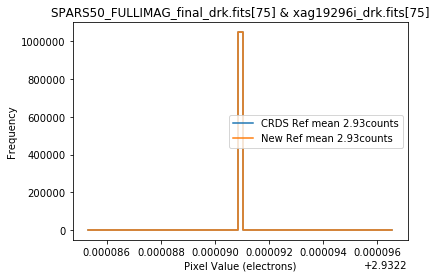

('New mean', 2.9322896)
('New STDDEV', 1.4305115e-06)
('New Median', 2.932291)
('New Max', 2.932291)
('New Min', 2.932291)
()
('Old mean', 2.9322896)
('Old STDDEV', 1.4305115e-06)
('Old Median', 2.932291)
('Old Max', 2.932291)
('Old Min', 2.932291)


In [175]:
#Compare time histograms (range +/- 4 * sigma)
for i in range(5,79,5):
    compare_hist(new_drk = 'SPARS50_FULLIMAG_final_drk.fits', crds_drk='xag19296i_drk.fits', ext=i, ext_type='samp', dq_mask = False)      


## 4.1.4.3: Compare up-the-ramp-levels

### Summary
This is the same code used in step 2.5 and in step 4.1.3.1 as a sanity check. This check
again uses uptheramp_rm_plotter_ignoreflags. This time we are only comparing the upthe-
ramp levels of the new and old superdarks.
To do this, create a new text file containing just the filename of the new superdark, and
the old CDBS/CRDS superdark, one per line. For the purposes of this check, the dotted
three-sigma envelope can be ignored.
### Scope
• This code should be used to test SCI and ERR extensions.
### Code Path
• detectors/ir_darkgen/uptheramp_rm_plotter_ignoreflags.pro
### Calling Sequence
• uptheramp_rm_plotter_ignoreflags,infilename,exten,/psout,/time_mode
### Inputs
• infilename: name of a text file containing a list of files to be plotted, one per line

• exten: type of fits file extension to be plotted (i.e. sci, err, dq, samp, or time).
### Optional Inputs
• psout: whether or not to generate postscript version of the plots. If not specified, the code will not produce postscript versions of the plots.

• time_mode: if set, the X-axis will be in elapsed exposure time, rather than read
number
### Output
• If the postscript generation option is turned on, then a copy of the plot will be
written to 'list_uptheramp_plot.ps'. This file will be overwritten for each image
displayed.
### Example Run
• Generate up-the-ramp plots for the SCI extensions of all the files listed in
supardarks.txt. Generate postscript plots and set the X-axis to show the elapsed
exposure time:
IDL> uptheramp_rm_plotter_ignoreflags,'superdarks.txt','sci',/psout,/time_mode

In [176]:
os.system('sublime superdarks.txt')
#'SPARS50_FULLIMAG_final_drk.fits', 'xag19296i_drk.fits'

0

In [ ]:
#IDL> .r uptheramp_rm_plotter_ignoreflags.pro
#IDL> uptheramp_rm_plotter_ignoreflags,'superdarks.txt','sci',/psout,/time_mode

## 4.1.4.4: Inspect X-axis and Y-axis marginal distributions
Summary
Depending on the user's choice of axis, this code steps through each of the 16 reads and
collapses down the rows or columns (using the same basic procedure as
detectors/ir_darkgen/list_plot_marg_dist.pro) of the input images to produce two marginal distributions. The two marginal distributions are plotted together along with a
separate plot of the percent difference between the two marginal distributions.
This code is useful for comparing larger-scale variations in the two input superdarks. It
also provides one last opportunity to check for IR banding (the pairs of vertical dotted an
dashed lines in the y-axis marginal distribution plot demarcate the boundaries of the band
regions).


### Scope
• This code should be used to test SCI extensions.
### Code Paths
• detectors/ir_darkgen/dual_plot_marg_dist_allreads.pro
• detectors/ir_darkgen/duel_plot_marg_dist_2.pro (called by
dual_plot_marg_dist_allreads.pro)
### Calling Sequence
• dual_plot_marg_dist_allreads,image1,image2,im1_lab,im2_lab,plot_axis,padding,
exten,psout=psout
### Inputs
• image1: name of first superdark to plot
• image2: name of second superdark to plot
• im1_lab: legend text for image1
• im2_lab: legend text for image2
• plot_axis: which axis to perform marginal distribution on ('X' or 'Y').
    o 'X' will collapse all pixels in each column into a single value, creating a "superrow" for plotting

    o 'Y' will collapse all pixels in each row into a single value, creating a "supercolumn" for plotting
    
• padding: The number of pixels in from each edge to ignore

• exten: fits file extension to probe (sci,err,dq,samp, or time) we recommend only
'sci'. Other extensions will yield non-sensible results.
### Optional Inputs
• psout: whether or not to generate postscript version of the plots. If not specified,
the code will not produce postscript versions of the plots.
### Outputs
• If the postscript generation option is turned on, then a copy of the plot will be
written to 'duelplot.ps' and duelplot_diff.ps. These files will be overwritten for
each image displayed.
### Example Runs
• Plot X-Axis marginal distribution ignoring the outer 10 pixels
IDL>dual_plot_marg_dist_allreads,'step200_fullimag_drk.fits','u48
1949mi_drk.fits','New','CDBS','x',10,'sci'

• Plot Y-Axis marginal distribution ignoring the outer 10 pixels, and generate a
postscript version of the plot.
IDL>dual_plot_marg_dist_allreads,'step200_fullimag_drk.fits','u48
1949mi_drk.fits','New','CDBS','y',10,'sci',/psout

In [180]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/duel_plot_marg_dist_2.pro ./')
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/dual_plot_marg_dist_allreads.pro ./')



0

In [ ]:
#IDL> .r dual_plot_marg_dist_allreads

#IDL> dual_plot_marg_dist_allreads,'SPARS50_FULLIMAG_final_drk.fits','xag19296i_drk.fits','New','CDBS','x',10,'sci'
#IDL> dual_plot_marg_dist_allreads,'SPARS100_FULLIMAG_final_drk.fits','xag19293i_drk.fits','New','CDBS','y',10,'sci'

## 4.1.4.5: Inspect hot pixel population for single image
### Summary
This code determines what percentage of hot pixels (those with values in excess of 5
times the 3-sigma clipped mean value for the whole frame) are flagged in the DQ array
with a non-zero data quality value, and what percentage are not flagged.

### Scope
• This code should be used to test SCI extensions.
### Code Path
• detectors/ir_darkgen/find_unflagged_hotpix.pro
### Calling Sequence
• find_unflagged_hotpix,imgname,readno
### Input
• imgname: name of the image to be examined
### Optional Input
• readno: specific read to examine. If not specified, the code will examine all reads
### Outputs
• For each read, the following information is printed to the screen:
Read number, 3-sigma clipped resistant mean value, Hot Pixel Minimum
Threshold Value, Number of flagged hot pixels, Percentage of all pixels,
Percentage of all hot pixels, Number of unflagged hot pixels, Percentage of all
pixels, and Percentage of all hot pixels
### Example Run
• Examine all reads of superdark spars10_fullimag_drk.fits:
IDL> find_unflagged_hotpix,'spars10_fullimag_drk.fits'

In [181]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/find_unflagged_hotpix.pro ./')

0

In [ ]:
#IDL> .r find_unflagged_hotpix.pro
#IDL> find_unflagged_hotpix,'SPARS50_FULLIMAG_final_drk.fits'

## 4.1.4.6: Compare hot pixel populations

In [182]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/compare_hotpix_pops.pro ./')

0

In [183]:
#IDL> .r compare_hotpix_pops.pro
#IDL> compare_hotpix_pops,'SPARS50_FULLIMAG_final_drk.fits','xag19296i_drk.fits'
#IDL> compare_hotpix_pops,'xag19296i_drk.fits','SPARS50_FULLIMAG_final_drk.fits'

# 4.2: Validation of header information
## 4.2.1: Manual checks of important header items

In [185]:
hdu = fits.open('SPARS50_FULLIMAG_final_drk.fits',mode = 'update')
hdu[0].header['*']

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                  -32 /bits per data value                             
NAXIS   =                    0 /number of axes                                  
EXTEND  =                    T /file may contain extensions                     
IRAF-TLM= '2018-05-27T18:43:13' / Time of last modification                     
ORIGIN  = 'HSTIO/CFITSIO March 2010'                                            
DATE    = '2018-06-05'         / date this file was written (yyyy-mm-dd)        
NEXTEND =                   80 / Number of standard extensions                  
FILENAME= 'SPARS50_FULLIMAG_final_drk.fits' / name of file                      
FILETYPE= 'DARK    '           / type of data found in data file                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'WFC3  '             / identifier for instrument used to acquire data 
EQUINOX =               2000

In [186]:
len(fits.getheader('SPARS50_FULLIMAG_final_drk.fits')['DESCRIP'])==67

True

In [566]:
# if len of descrip is not equal to 67
del hdu[0].header['DESCRIP']      
hdu[0].header['DESCRIP'] = 'Dark Created from 142 frames spanning cycles 17 to 24--------------'
hdu.close()

# Compare histograms, read by read

# 4.2.2: Certify
### Summary
### Certify verifies that the information in the header and the formatting of the header information meets specifications listed in ICD-47.

In [187]:
os.system('mkdir /grp/hst/wfc3v/mmckay/ir_darks/ir_superdark')
os.system('cp ./SPARS50_FULLIMAG_final_drk.fits /grp/hst/wfc3v/mmckay/ir_darks/ir_superdark')

0

In [ ]:
#Must run in  plhstins1 ---- does not work
# certify SPARS200_FULLIMAG_final_drk.fits - does not work
#or
#plhstins1> bash
#bash-4.1$ source activate astroconda36
#(astroconda36) bash-4.1$ cd /grp/hst/wfc3v/mmckay/ir_darks/ir_superdark/
#(astroconda36) bash-4.1$ fitsverify SPARS50_FULLIMAG_final_drk.fits
#

# 4.3.1: Locate a 16-read external science observation that is the same size and same sample sequence as the newly created superdark calibration file.

### Summary
In order to perform the functional tests, a 16-read external science image with the same
sample sequence/subtype combination as the new superdark is needed. This script queries
the quicklook database for 16-read non-dark external science images whose sample
sequence and subarray type matches user-specified inputs. We strongly advise users to
inspect the jpeg previews in order to select the best test image.


### Code Path
• detectors/ir_darkgen/find_ext_sci_files.py

### Calling Sequence
• find_ext_sci_files.py samp_seq subtype

### Inputs
• samp_seq: the desired sample sequence to be used in the query

• subtype: the desired subtype, or aperture size to be used in the query

    o A list of the valid sample sequences and subtypes can be found in Table 1. 
### Outputs
• The code prints the full path of the JPEG preview image, rootname, proposal id,
linenum, and target name for each observation that matches the query.

### Example Run
• Find all RAPID/full-frame external science images:
python find_ext_sci_files.py "RAPID" "FULLIMAG"

### 4.3.2: Download raw, spt, ima, flt,trl files from MAST
• Follow the same steps as in step 1.2.

• Instead of specifying a list of input files, just copy/paste in the root name of the one test file that will be used for the functional test

• Make sure to specify the following filetypes for download: raw, spt, ima, flt, and trl

In [188]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/find_ext_sci_files.py ./')

0

In [189]:
%run find_ext_sci_files.py "SPARS50" "FULLIMAG"

JPEG Preview Image Filename | Rootname | Proposal # | Linenum | Target
/grp/hst/wfc3a/Quicklook/11932/JPEG/Visit03-ibcma3lbq_flt.jpg | ibcma3lbq | 11932 | 03.006 | NONE
/grp/hst/wfc3a/Quicklook/11447/JPEG/Visit33-iabz33rhq_flt.jpg | iabz33rhq | 11447 | 33.006 | ANTI-SUN
/grp/hst/wfc3a/Quicklook/11447/JPEG/Visit33-iabz33rjq_flt.jpg | iabz33rjq | 11447 | 33.007 | ANTI-SUN
/grp/hst/wfc3a/Quicklook/11447/JPEG/Visit33-iabz33rlq_flt.jpg | iabz33rlq | 11447 | 33.008 | ANTI-SUN
/grp/hst/wfc3a/Quicklook/11447/JPEG/Visit33-iabz33rnq_flt.jpg | iabz33rnq | 11447 | 33.009 | ANTI-SUN
/grp/hst/wfc3f/QL_GO/11570/JPEG/Visit22-ib1f22jsq_flt.jpg | ib1f22jsq | 11570 | 22.001 | NGC-3982
/grp/hst/wfc3f/QL_GO/11570/JPEG/Visit22-ib1f22jtq_flt.jpg | ib1f22jtq | 11570 | 22.001 | NGC-3982
/grp/hst/wfc3f/QL_GO/11570/JPEG/Visit22-ib1f22jvq_flt.jpg | ib1f22jvq | 11570 | 22.001 | NGC-3982
/grp/hst/wfc3f/QL_GO/11570/JPEG/Visit22-ib1f22jxq_flt.jpg | ib1f22jxq | 11570 | 22.001 | NGC-3982
/grp/hst/wfc3f/QL_GO/11738/JPEG

## 4.3.3: Execute comparative calwf3 runs

### Summary
This script performs a functional test of a user-specified superdark by recalibrating a
user-specified raw.fits file with the superdark. As a comparison, the raw file is also
recalibrated with the current CDBS/CRDS superdark so that the resulting calibrated
images can be compared. The code handles the logistics as well. The code creates
subdirectories for each calwf3 run, copies the raw file and the superdark to the
subdirectores, updates the DARKFILE header keyword to point to the new superdark,
runs calwf3, and locks down file and directory permissions (700 for the subdirectories
and 600 for the files) as a precaution to protect proprietary data.
### Code Path
• detectors/ir_darkgen/run_dark_comparison_calwf3.py

### Calling Sequence
• run_dark_comparison_calwf3.py raw_fn dark_fn

### Inputs
• raw_fn: full filename (including path if necessary) of the raw.fits science image to
be reprocessed by calwf3

• dark_fn: full filename (including path if necessary) of the new superdark to be
functionally tested

### Outputs
• The code generates the usual set of calibrated calwf3 output files (.trl, ima.fits,
flt.fits) in subdirectories new_dark/ and cdbs_dark/

### Example Run
• Perform functional test on superdark spars10_sq128sub_drk.fits using external
science observation ibkf10tcq_raw.fits:

python run_dark_comparison_calwf3.py "orig/ibkf10tcq_raw.fits"
"spars10_sq128sub_drk.fits"

In [22]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/run_dark_comparison_calwf3.py ./')

0

In [23]:
%run run_dark_comparison_calwf3.py 'ib1i04phq_raw.fits' 'SPARS50_FULLIMAG_final_drk.fits'

chmod 600 ib1i04phq*
-----------------------------------------------------------------------------------------
                         >>Running CALWF3 with CDBS dark<<
-----------------------------------------------------------------------------------------




CALWF3BEG*** CALWF3 -- Version 3.4(28-Sep-2016) ***

Begin    10-Jun-2018 11:04:59 EDT





Input    ib1i04phq_raw.fits

loading asn



LoadAsn:  Processing SINGLE exposure

Trying to open ib1i04phq_raw.fits...

Read in Primary header from ib1i04phq_raw.fits...

Creating new trailer file `ib1i04phq.tra'.





CALWF3BEG*** WF3IR -- Version 3.4(28-Sep-2016) ***

Begin    10-Jun-2018 11:05:09 EDT

Input    ib1i04phq_raw.fits

Output   ib1i04phq_flt.fits

Trying to open ib1i04phq_raw.fits...

Read in Primary header from ib1i04phq_raw.fits...

APERTURE IR

FILTER   F110W

DETECTOR IR

Reading data from ib1i04phq_raw.fits ...



CCDTAB   iref$t2c16200i_ccd.fits

CCDTAB   PEDIGREE=Ground

CCDTAB   DESCRIP =Reference data based on The

## 4.3.5: Compare the resulting calibrated flt.fits and ima.fits files



In [28]:
os.system('cp /Users/mmckay/Desktop/wfc3_ir_darks/revised_scripts/vis_compare_caltest_gensize.py ./')   

0

In [31]:
%run vis_compare_caltest_gensize.py "new_dark/ib1i04phq_flt.fits" "cdbs_dark/ib1i04phq_flt.fits" "sci"    

IndexError: list index out of range

In [354]:
%run vis_compare_caltest_gensize.py "new_dark/ib4p01ryq_ima.fits" "cdbs_dark/ib4p01ryq_ima.fits" "[1]"

IndexError: list index out of range

## Calculate statistics and displays the calibrated (flt.fits) external image

In [55]:
cdbs_flt = './crds_dark/ib1i04phq_flt.fits'
new_flt = './new_dark/ib1i04phq_flt.fits'

ext = 1
print('Compare external image (DQ Applied)')
print('')
print('CRDS dark')
image_stats(cdbs_flt, dq_mask = 'yes', ext_num = ext)
print('New dark')
image_stats(new_flt, dq_mask = 'yes', ext_num = ext)

print('Compare external image (NO DQ Applied)')
print('')
print('CRDS dark')
image_stats(cdbs_flt, dq_mask = 'no', ext_num = ext)
print('New dark')
image_stats(new_flt, dq_mask = 'no', ext_num = ext)

print ('ds9 {}[{}] {}[{}]'.format(cdbs_flt, ext, new_flt, ext))
os.system('ds9 -zscale -lock frame scale {}[{}] {}[{}]'.format(cdbs_flt, ext, new_flt, ext))        


Compare external image (DQ Applied)

CRDS dark
DQ MASK APPLIED
ib1i04phq_flt.fits EXT: 1 Statistics ------------------------
mean = 2.33118343353 ELECTRONS/S
stddev = 37.1675643921 ELECTRONS/S
median = 1.1175301075 ELECTRONS/S
min = -2.93535208702 ELECTRONS/S
max = 19209.3671875 ELECTRONS/S

New dark
DQ MASK APPLIED
ib1i04phq_flt.fits EXT: 1 Statistics ------------------------
mean = 2.33158874512 ELECTRONS/S
stddev = 37.1711769104 ELECTRONS/S
median = 1.11782038212 ELECTRONS/S
min = -2.93670773506 ELECTRONS/S
max = 19209.3671875 ELECTRONS/S

Compare external image (NO DQ Applied)

CRDS dark
NO DQ MASK
ib1i04phq_flt.fits EXT: 1 Statistics ------------------------
mean = 2.40483355522 ELECTRONS/S
stddev = 107.326728821 ELECTRONS/S
median = 1.11746549606 ELECTRONS/S
min = -16717.1269531 ELECTRONS/S
max = 91367.9375 ELECTRONS/S

New dark
NO DQ MASK
ib1i04phq_flt.fits EXT: 1 Statistics ------------------------
mean = 2.39684391022 ELECTRONS/S
stddev = 99.1573944092 ELECTRONS/S
median = 1.1

0

## Calculate statistics of the IMA external image for each read

In [44]:
cdbs_ima = './cdbs_dark/ib1i04phq_ima.fits'
new_ima = './new_dark/ib1i04phq_ima.fits'

for i in range(1,80,5):
    ext = i
    print('Compare external image (DQ Applied)')
    image_stats(cdbs_ima, dq_mask = 'yes', ext_num = ext)
    image_stats(new_ima, dq_mask = 'yes', ext_num = ext)
    
    print('Compare external image (NO DQ Applied)')
    image_stats(cdbs_ima, dq_mask = 'no', ext_num = ext)
    image_stats(new_ima, dq_mask = 'no', ext_num = ext)
    
    print ('ds9 {}[{}] {}[{}]'.format(cdbs_ima, ext, new_ima, ext))
    os.system('ds9 -zscale -lock frame scale {}[{}] {}[{}]'.format(cdbs_ima, ext, new_ima, ext))      

    

Compare external image (DQ Applied)
DQ MASK APPLIED
ib1i04phq_ima.fits EXT: 1 Statistics ------------------------
mean = 1.84878146648 ELECTRONS/S
stddev = 3.8117711544 ELECTRONS/S
median = 1.11957895756 ELECTRONS/S
min = -79.8311462402 ELECTRONS/S
max = 104.651367188 ELECTRONS/S

DQ MASK APPLIED
ib1i04phq_ima.fits EXT: 1 Statistics ------------------------
mean = 1.84908974171 ELECTRONS/S
stddev = 3.81151008606 ELECTRONS/S
median = 1.11986470222 ELECTRONS/S
min = -79.8311462402 ELECTRONS/S
max = 104.653579712 ELECTRONS/S

Compare external image (NO DQ Applied)
NO DQ MASK
ib1i04phq_ima.fits EXT: 1 Statistics ------------------------
mean = 1.95625567436 ELECTRONS/S
stddev = 88.6287765503 ELECTRONS/S
median = 1.12189412117 ELECTRONS/S
min = -86405.4296875 ELECTRONS/S
max = 18219.0859375 ELECTRONS/S

NO DQ MASK
ib1i04phq_ima.fits EXT: 1 Statistics ------------------------
mean = 1.95858502388 ELECTRONS/S
stddev = 86.91040802 ELECTRONS/S
median = 1.12215554714 ELECTRONS/S
min = -84581.289

## Computes and displays the ratio(new/crds) and difference() flt.fits files 

/Users/mmckay/miniconda3/envs/astroconda27/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in divide
/Users/mmckay/miniconda3/envs/astroconda27/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide


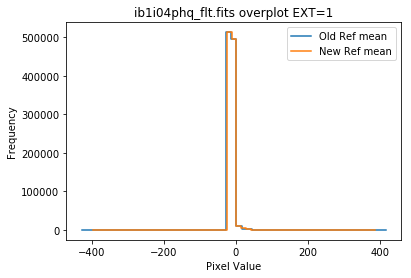

NO DQ MASK
ib1i04phq_flt.fits EXT: 1 Statistics ------------------------
mean = 2.40483355522 ELECTRONS/S
stddev = 107.326728821 ELECTRONS/S
median = 1.11746549606 ELECTRONS/S
min = -16717.1269531 ELECTRONS/S
max = 91367.9375 ELECTRONS/S

NO DQ MASK
ib1i04phq_flt.fits EXT: 1 Statistics ------------------------
mean = 2.39684391022 ELECTRONS/S
stddev = 99.1573944092 ELECTRONS/S
median = 1.11776781082 ELECTRONS/S
min = -16717.1269531 ELECTRONS/S
max = 81359.171875 ELECTRONS/S

----------Ratio Stats----------
NO DQ MASK
flt_ratios_diff.fits EXT: 0 Statistics ------------------------
mean = nan COUNTS
stddev = nan COUNTS
median = 1.00020861626 COUNTS
min = -inf COUNTS
max = inf COUNTS

----------Diff Stats-----------
NO DQ MASK
flt_ratios_diff.fits EXT: 1 Statistics ------------------------
mean = -0.00799012370408 COUNTS
stddev = 9.88496685028 COUNTS
median = 0.000325322151184 COUNTS
min = -10008.765625 COUNTS
max = 284.271484375 COUNTS



0

In [89]:
crds_file = './cdbs_dark/ib1i04phq_flt.fits'
new_file = './new_dark/ib1i04phq_flt.fits'


crds_flt = fits.open(crds_file)
new_flt = fits.open(new_file)

sci = 1
dq = sci + 2

crds_sci = crds_flt[sci].data
crds_dq = crds_flt[dq].data

new_sci =  new_flt[sci].data
new_dq =  new_flt[dq].data

flt_diff = new_sci - crds_sci
#crds_sci[crds_dq != 0] = np.nan
#new_sci[new_dq != 0] = np.nan
flt_ratio = new_sci / crds_sci


crds_flt.close()
new_flt.close()

sig_old1 = np.nanstd(crds_sci); med_old1 = np.nanmedian(crds_sci); h_old1, b_old1 = np.histogram(crds_sci[~np.isnan(crds_sci)],range=[med_old1-4*sig_old1,med_old1+4*sig_old1],bins=60)      
sig_new1 = np.nanstd(new_sci); med_new1 = np.nanmedian(new_sci); h_new1, b_new1 = np.histogram(new_sci[~np.isnan(new_sci)],range=[med_new1-4*sig_new1,med_new1+4*sig_new1],bins=60)

plt.step(b_old1[:-1],h_old1,label='Old Ref mean')
plt.step(b_new1[:-1],h_new1,label='New Ref mean')
plt.title('{} overplot EXT={}'.format(crds_file[-18:], sci))
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.clf()


image_stats(crds_file, dq_mask = 'no', ext_num = 1)
image_stats(new_file, dq_mask = 'no', ext_num = 1)

new_hdul = fits.HDUList()
new_hdul.append(fits.ImageHDU(flt_ratio))
new_hdul.append(fits.ImageHDU(flt_diff))
new_hdul.writeto('flt_ratios_diff.fits',overwrite = True)

#Read in files 
image = fits.open('flt_ratios_diff.fits', mode = 'update')
image[1].header['BUNIT'] = 'COUNTS'
image[0].header['FILENAME'] = 'flt_ratios_diff.fits'
image.close()


ratio_diff_flt = 'flt_ratios_diff.fits'

print('----------Ratio Stats----------')
a = 0
image_stats(ratio_diff_flt, dq_mask = 'no', ext_num = a)

print('----------Diff Stats-----------')
b = 1
image_stats(ratio_diff_flt, dq_mask = 'no', ext_num = b)

os.system('ds9 ./flt_ratios_diff.fits[{}] ./flt_ratios_diff.fits[{}] &'.format(a,b))


# Extra codes-------------------------------------------

In [355]:
list_of_files = []
for i in range(1,80,5):
    file_ext = 'ib4p01ryq_ima.fits'
    list_of_files.append(file_ext)
    ext = '[{}]'.format(i)

for i in range(1,80,5):
    ext = '[{}]'.format(i)
    files = [x + ext for x in list_of_files]
    #print(files)
    os.system('ds9 -zscale -zoom 0.5 {} &'.format(files))

#list_of_files = glob.glob('*flt.fits')
#print(type(list_of_files))
#ext='[]'
#files = [x + ext for x in list_of_files]
##print(files)
#files= ' '.join(files)
#print(files)
##os.system('ds9 -zscale -zoom 0.5 {} &'.format(files))

In [341]:
#os.chdir('./new_dark/')
list_of_files = []
for i in range(1,80,5):
    file_ext = 'ib4p01ryq_ima.fits[{}]'.format(i)
    files_ext.append(file_ext)
    

    
    
for x in files_ext:
    files = ''.join(x)
    print(files)

    os.system('ds9 -zscale -zoom 0.5 {} &'.format(files))

#files = [x + ext for x in list_of_files]
#print(files)
#files= ' '.join(files)
#os.system('ds9 -zscale -zoom 0.5 {} &'.format(files))

ib4p01ryq_ima.fits[1]
ib4p01ryq_ima.fits[6]
ib4p01ryq_ima.fits[11]
ib4p01ryq_ima.fits[16]
ib4p01ryq_ima.fits[21]
ib4p01ryq_ima.fits[26]
ib4p01ryq_ima.fits[31]
ib4p01ryq_ima.fits[36]
ib4p01ryq_ima.fits[41]
ib4p01ryq_ima.fits[46]
ib4p01ryq_ima.fits[51]
ib4p01ryq_ima.fits[56]
ib4p01ryq_ima.fits[61]
ib4p01ryq_ima.fits[66]
ib4p01ryq_ima.fits[71]
ib4p01ryq_ima.fits[76]


In [339]:
hdu = fits.open('ib4p01ryq_ima.fits')
hdu.info()
hdu.close()

Filename: ib4p01ryq_ima.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     260   ()      
  1  SCI           1 ImageHDU        81   (1024, 1024)   float32   
  2  ERR           1 ImageHDU        43   (1024, 1024)   float32   
  3  DQ            1 ImageHDU        35   (1024, 1024)   int16   
  4  SAMP          1 ImageHDU        30   ()      
  5  TIME          1 ImageHDU        30   ()      
  6  SCI           2 ImageHDU        81   (1024, 1024)   float32   
  7  ERR           2 ImageHDU        43   (1024, 1024)   float32   
  8  DQ            2 ImageHDU        35   (1024, 1024)   int16   
  9  SAMP          2 ImageHDU        30   ()      
 10  TIME          2 ImageHDU        30   ()      
 11  SCI           3 ImageHDU        81   (1024, 1024)   float32   
 12  ERR           3 ImageHDU        43   (1024, 1024)   float32   
 13  DQ            3 ImageHDU        35   (1024, 1024)   int16   
 14  SAMP          3 ImageHDU        30   ()    

In [ ]:
sig_ratio = np.nanstd(flt_ratio); med_ratio = np.nanmedian(flt_ratio); h_old1, b_old1 = np.histogram(flt_ratio[~np.isnan(flt_ratio)],range=[med_ratio-4*sig_ratio,med_ratio+4*sig_ratio],bins=60)
sig_new = np.nanstd(newsci_ext); med_new1 = np.nanmedian(newsci_ext); h_new1, b_new1 = np.histogram(newsci_ext[~np.isnan(newsci_ext)],range=[med_new1-4*sig_new1,med_new1+4*sig_new1],bins=60)
#mean_old1 = np.nanmean(oldsci_ext)
#mean_new1 = np.nanmean(newsci_ext)

plt.step(b_old1[:-1],h_old1,label='Old Ref mean {}counts'.format("%.2f" % mean_old1))
plt.step(b_new1[:-1],h_new1,label='New Ref mean {}counts'.format("%.2f" % mean_new1))
plt.ylabel('Frequency')
plt.xlabel('Pixel Value (electrons)')
#plt.step(b_diff1[:-1],h_diff1)
plt.legend()
plt.savefig('chip1_scidq_hist.png')
plt.show()
plt.clf()
new_file.close()
old_file.close()

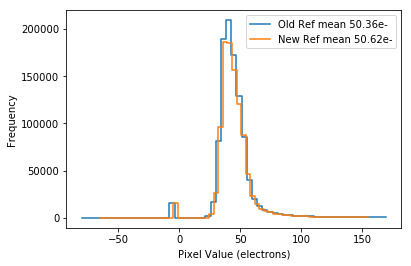

('New mean', 50.619854)
('New STDDEV', 27.898815)
('New Median', 46.923832)
('New Max', 12076.443)
('New Min', -2393.2339)
()
('Old mean', 50.355816)
('Old STDDEV', 31.702934)
('Old Median', 46.816563)
('Old Max', 20443.262)
('Old Min', -2393.5947)


In [214]:
sci=11
dq=sci+2

plt.clf()
new = 'SPARS200_FULLIMAG_final_drk.fits'
old = 'x5g1509ki_drk.fits'
new_file = fits.open(new)
old_file = fits .open(old)
newsci_ext = new_file[sci].data
newdq_ext =  new_file[dq].data
oldsci_ext = old_file[sci].data
olddq_ext =  old_file[dq].data

newsci_ext[newdq_ext != 0] = np.nan
oldsci_ext[olddq_ext != 0] = np.nan

sig_old1 = np.nanstd(oldsci_ext); med_old1 = np.nanmedian(oldsci_ext); h_old1, b_old1 = np.histogram(oldsci_ext[~np.isnan(oldsci_ext)],range=[med_old1-4*sig_old1,med_old1+4*sig_old1],bins=60)
sig_new1 = np.nanstd(newsci_ext); med_new1 = np.nanmedian(newsci_ext); h_new1, b_new1 = np.histogram(newsci_ext[~np.isnan(newsci_ext)],range=[med_new1-4*sig_new1,med_new1+4*sig_new1],bins=60)
mean_old1 = np.nanmean(oldsci_ext)
mean_new1 = np.nanmean(newsci_ext)

plt.step(b_old1[:-1],h_old1,label='Old Ref mean {}e-'.format("%.2f" % mean_old1))
plt.step(b_new1[:-1],h_new1,label='New Ref mean {}e-'.format("%.2f" % mean_new1))
plt.ylabel('Frequency')
plt.xlabel('Pixel Value (electrons)')
#plt.step(b_diff1[:-1],h_diff1)
plt.legend()
plt.savefig('chip1_scidq_hist.png')
plt.show()
plt.clf()
new_file.close()
old_file.close()

print('New mean' ,np.nanmean(newsci_ext))
print('New STDDEV', np.nanstd(newsci_ext))
print('New Median', np.nanmedian(newsci_ext))
print('New Max', np.nanmax(newsci_ext))
print('New Min', np.nanmin(newsci_ext))
print()

print('Old mean',np.nanmean(oldsci_ext))
print('Old STDDEV', np.nanstd(oldsci_ext))
print('Old Median', np.nanmedian(oldsci_ext))
print('Old Max', np.nanmax(oldsci_ext))
print('Old Min', np.nanmin(oldsci_ext))

In [63]:
os.chdir('/Users/mmckay/Desktop/wfc3_ir_darks/SPARS200_darks/')
f_list = glob.glob('*flt.fits')
for f in f_list:
    hdu=fits.open(f)
    #print(hdu[0].header['filename'],hdu[0].header['date-obs'],hdu[0].header['PROPOSID'],hdu[0].header['SAMP_SEQ'])
    samp_seq = hdu[0].header['SAMP_SEQ']
    filename = hdu[0].header['filename']
    if samp_seq == 'SPARS200':
        #os.system('cp ./{} ../SPARS200_darks1/'.format(filename))
        print(filename)

ibcu07ykq_flt.fits
ibcu0ldxq_flt.fits
ibcu0yvqq_flt.fits
ibcu1lv1q_flt.fits
ibcu1yi2q_flt.fits
ibcu20djq_flt.fits
ibcu2ldjq_flt.fits
ibcu2ywtq_flt.fits
ibcu33onq_flt.fits
ibcu3lwmq_flt.fits
ibcu3ywvq_flt.fits
ibcu4lfmq_flt.fits
ibcu4ydgq_flt.fits
ibcu59fkq_flt.fits
ibcu5ldbq_flt.fits
ibcu5ydaq_flt.fits
ibcu6lq3q_flt.fits
ibcu6ydsq_flt.fits
ibcu72buq_flt.fits
ibcu7llaq_flt.fits
ibcu7yxnq_flt.fits
ibcu85v8q_flt.fits
ibcu8ldzq_flt.fits
ibcu8yd7q_flt.fits
ibcu98b1q_flt.fits
ibcu9ldzq_flt.fits
ibcuabmaq_flt.fits
ibcub1tyq_flt.fits
ibcubecnq_flt.fits
iblt0lcxq_flt.fits
iblt15c6q_flt.fits
iblt1bdcq_flt.fits
iblt1rfoq_flt.fits
iblt2hfxq_flt.fits
iblt2xfqq_flt.fits
iblt31bkq_flt.fits
iblt3nbyq_flt.fits
iblt47hbq_flt.fits
iblt4dgwq_flt.fits
iblt4tetq_flt.fits
iblt5jf5q_flt.fits
iblt5zasq_flt.fits
iblt63chq_flt.fits
iblt6plcq_flt.fits
iblt79bgq_flt.fits
iblt7fg2q_flt.fits
iblt7vc7q_flt.fits
iblt8ldzq_flt.fits
iblt95btq_flt.fits
iblt9bf9q_flt.fits
iblt9rbkq_flt.fits
iblta7eas_flt.fits
ibltanamq_fl

(0.069961622, 32.907181, 5734.2563, -19066.324)


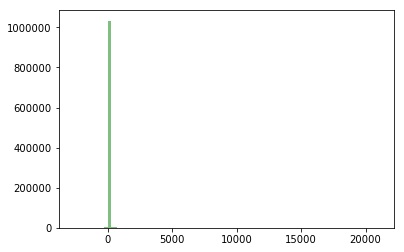

In [230]:
from scipy import stats
import matplotlib.pyplot as plt

os.chdir('/Users/mmckay/Desktop/wfc3_ir_darks/SPARS200_darks/compare darks/')
old = fits.open('x5g1509ki_drk.fits')
mine = fits.open('SPARS200_FULLIMAG_final_drk.fits')

ext = 1

old_data = old[ext].data
mine_data = mine[ext].data
a = mine_data - old_data
diff_med = np.median(a)
result = a - diff_med

#ratio = old_data / mine_data
print(np.mean(a),np.std(a), np.max(a), np.min(a))
Ratio_new_hdul = fits.HDUList()
Ratio_new_hdul.append(fits.ImageHDU(a))
Ratio_new_hdul.append(fits.ImageHDU(result))
Ratio_new_hdul.writeto('ratios.fits',overwrite = True)

old.close()
mine.close()

In [10]:
hdu = fits.open('ibcu0ldxq_ima_persflag.fits')
hdu.info()
hdu.close()

Filename: ibcu0ldxq_ima_persflag.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     250   ()      
  1  SCI           1 ImageHDU        81   (1024, 1024)   float32   
  2  ERR           1 ImageHDU        43   (1024, 1024)   float32   
  3  DQ            1 ImageHDU        35   (1024, 1024)   int16   
  4  SAMP          1 ImageHDU        30   ()      
  5  TIME          1 ImageHDU        30   ()      
  6  SCI           2 ImageHDU        81   (1024, 1024)   float32   
  7  ERR           2 ImageHDU        43   (1024, 1024)   float32   
  8  DQ            2 ImageHDU        35   (1024, 1024)   int16   
  9  SAMP          2 ImageHDU        30   ()      
 10  TIME          2 ImageHDU        30   ()      
 11  SCI           3 ImageHDU        81   (1024, 1024)   float32   
 12  ERR           3 ImageHDU        43   (1024, 1024)   float32   
 13  DQ            3 ImageHDU        35   (1024, 1024)   int16   
 14  SAMP          3 ImageHDU        30

In [ ]:
hdu = fits.open

In [1]:
from pyql.database.ql_database_interface import session

In [2]:
from pyql.database.ql_database_interface import Master
from pyql.database.ql_database_interface import IR_flt_0

In [23]:
imagename = 'id0c01lqq'

results = session.query(Master.rootname, Master.dir, Master.detector).\
    filter(Master.rootname == imagename).all()
rootnames = [item.rootname for item in results]
dirs = [item.dir for item in results]
detector = [item.detector for item in results]
print(results)

[('id0c01lqq', '/grp/hst/wfc3i/Quicklook/14374/Visit01', 'ir')]


In [10]:
print(dirs[0])

/grp/hst/wfc3a/Quicklook/11905/VisitM3


In [ ]:
import os
import subprocess
import sys
import pyraf
from pyraf import iraf
from iraf import images,imutil,stsdas,toolbox,headers
from astropy.io import fits as pyfits
from astropy.table import Table, Column
from pyql.database.ql_database_interface import session
from pyql.database.ql_database_interface import Master
from pyql.database.ql_database_interface import IR_flt_0

os.chdir(./ir_test/)


def get_extper_file(imagename):
    '''
    uses quickloook Database query to determine path to _extper.fits file
    '''
    
    connection = session.quary(Master.rootname, Master.dir, Master.detector).all()
    results = session.query(Master.rootname, Master.dir, Master.detector)
    filter(Master.rootname == imagename).all()
    #connection = sqlite3.connect('/grp/hst/wfc3a/Database/ql.db')
    #cursor = connection.cursor()
    #cursor.execute('SELECT dir FROM master WHERE master.FILENAME="%s"'%(imagename)) #get main header table
    for row in cursor:
        ep_path = row[0]
    cursor.close()
    if ep_path[len(ep_path)-1:len(ep_path)] !="/": #correct for the fact that master.dir sometimes end wiht a slash and sometimes doesn't 
        ep_path="%s/"%(ep_path)
    return "%sPersist/%s_extper.fits"%(ep_path, imagename[0:9])

In [ ]:
#Kai squared method
flts = glob.glob('*flt.fits')
model = fits.open('ibcu37zgq_flt.fits')
model_sci = model[1].data
model_dq = model[3].data
#model_arr = model_sci[model_dq != 0] = 
model_colmed = np.median(model_sci, 0)
file_num = []
chi_sqs = []
num = 1
for i in flts:
    file_num = np.append(num, file_num)
    hdu = fits.open(i)
    sci_data = hdu[1].data
    dq_data = hdu[3].data
    #image = sci_data[dq_data != 0] = 0
    image_colmed = np.median(sci_data, 0)
    chi_sq = np.nansum(((image_colmed - model_colmed)**2) / model_colmed)
    chi_sqs = np.append(chi_sq, chi_sqs)
    #print(kai_sq)
    num += 1
    hdu.close()
med_chi = np.median(chi_sqs)
std_chi = np.std(chi_sqs)
plt.hist(chi_sqs, range=[med_chi-1*std_chi,med_chi+1*std_chi], bins=150)
#plt.xlim([-20,20])
#plt.ylabel('file number')
#plt.xlabel('chi_sq')
plt.show()
plt.clf()